# RQ3: Has the level of the NBA gotten worse or better?

With this research question we aim to investigate if the level of the NBA has gotten better or worse using a comprehensive data-driven approach based on metrics . By using player and team statistics and college statistics scraped from the nba site (using the `nba_api`), we seek to provide actionable insights and recommendations for exploring whether the level has improved or deteriorated.

So, now we're going to be putting on our detective hats to crack the case of whether the NBA's gotten better or worse over the years. Armed with a bunch of data on player performance, team stats, and more from the `nba_api`, we're diving deep to see if today's game stacks up to the glory days. From scoring to playmaking to a case study, we're crunching numbers to see if the game's evolved for the better or if it's gone a bit stale. But as usual, it's not just about nostalgia – we're hoping to uncover some juicy insights that might just change the way you see the modern NBA. So, buckle up and let's take a trip down basketball memory lane!

<br />

We will be approaching this question with 3 things to take into account:

1)scoring: are players scoring more points? are teams scoring more points? why?

2)playmaking: are players becoming better playmakers? are players taking up multiple roles within a team? 

3)defence: how are the top players defending? what is the average points scored by teams? is there correlation between the players defensive stats and their opponents scoring? 

4)Case Study: Steve Nash MVP Season (scroll down to unfold this beauty ;) ) 
<br />


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import plotly.express as px
import polars as pl

sns.set_context('talk', font_scale=0.8)

Firstly, let us load the relevant datasets and inspect them to see what data we are dealing with and what insights we can gain from our data:

In [74]:
playerStats = pd.read_csv('../data/cleaned/players_data/player_stats.csv')
teamStats = pd.read_csv('../data/cleaned/team_regSeason_data/team_regSeason_stats.csv')
gameData = pd.read_csv('../data/cleaned/team_game_data/team_game_stats.csv')
collegeStats = pd.read_csv('../data/cleaned/player_college_data/player_college_stats.csv')
draftData = pd.read_csv('../data/cleaned/draft_data/draft_data.csv')


In [75]:
playerStats

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1985-86,0,22.0,82,1.0,...,0.611,160.0,221.0,381.0,54,49.0,49.0,99.0,229,521
1,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1986-87,0,23.0,79,72.0,...,0.780,210.0,405.0,615.0,84,70.0,80.0,102.0,171,852
2,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1987-88,0,24.0,82,64.0,...,0.773,245.0,465.0,710.0,93,87.0,45.0,120.0,204,937
3,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1988-89,0,25.0,82,82.0,...,0.786,258.0,481.0,739.0,103,94.0,55.0,119.0,172,1088
4,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1989-90,0,26.0,82,82.0,...,0.751,262.0,450.0,712.0,90,66.0,50.0,116.0,207,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26739,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2008-09,0,34.0,65,65.0,...,0.799,157.0,333.0,490.0,64,28.0,84.0,90.0,183,838
26740,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2009-10,0,35.0,64,6.0,...,0.743,114.0,231.0,345.0,48,14.0,50.0,63.0,183,474
26741,980,Zydrunas Ilgauskas,1610612748,Miami Heat,MIA,2010-11,0,36.0,72,51.0,...,0.783,108.0,179.0,287.0,26,23.0,58.0,52.0,185,360
26742,1629597,Zylan Cheatham,1610612740,New Orleans Pelicans,NOP,2019-20,0,24.0,4,0.0,...,0.000,3.0,6.0,9.0,3,1.0,1.0,4.0,10,12


In [76]:
playerStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26744 entries, 0 to 26743
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 26744 non-null  int64  
 1   player_name               26744 non-null  object 
 2   team_id                   26744 non-null  int64  
 3   team_name                 26744 non-null  object 
 4   team_abbr                 26736 non-null  object 
 5   season                    26744 non-null  object 
 6   league_id                 26744 non-null  int64  
 7   age                       26744 non-null  float64
 8   games_played              26744 non-null  int64  
 9   games_started             21281 non-null  float64
 10  minutes_played            26439 non-null  float64
 11  field_goals_made          26744 non-null  int64  
 12  field_goals_attempted     26744 non-null  int64  
 13  field_goal_pct            26739 non-null  float64
 14  three_

In [77]:
teamStats

,team_id,team_name,team_city,team_nickname,season,games_played,wins,losses,win_pct,conference_rank,...,offensive_rebounds,defensive_rebounds,total_rebounds,assists,personal_fouls,steals,turnovers,blocks,points,points_rank
0,1610612737,Atlanta Hawks,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,...,0,0,0,1330,2057,0,0,0,5313,10
1,1610612737,Atlanta Hawks,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,...,0,0,0,1476,2092,0,0,0,5730,3
2,1610612737,Atlanta Hawks,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,...,0,0,0,1229,1848,0,0,0,4833,10
3,1610612737,Atlanta Hawks,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,...,0,0,0,1427,2120,0,0,0,5389,9
4,1610612737,Atlanta Hawks,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,...,0,0,0,1298,1771,0,0,0,5038,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,1610612764,Washington Wizards,Washington,Wizards,2019-20,72,25,47,0.347,9,...,732,2295,3027,1801,1634,574,1020,309,8238,8
1623,1610612764,Washington Wizards,Washington,Wizards,2020-21,72,34,38,0.472,0,...,697,2557,3254,1835,1555,528,1036,297,8398,3
1624,1610612764,Washington Wizards,Washington,Wizards,2021-22,82,35,47,0.427,12,...,737,2798,3535,2052,1545,522,1077,406,8907,22
1625,1610612764,Washington Wizards,Washington,Wizards,2022-23,82,35,47,0.427,12,...,774,2804,3578,2083,1539,561,1158,424,9279,21


In [78]:
teamStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team_id                   1627 non-null   int64  
 1   team_name                 1627 non-null   object 
 2   team_city                 1627 non-null   object 
 3   team_nickname             1627 non-null   object 
 4   season                    1627 non-null   object 
 5   games_played              1627 non-null   int64  
 6   wins                      1627 non-null   int64  
 7   losses                    1627 non-null   int64  
 8   win_pct                   1627 non-null   float64
 9   conference_rank           1627 non-null   int64  
 10  division_rank             1627 non-null   int64  
 11  playoff_wins              1627 non-null   int64  
 12  playoff_losses            1627 non-null   int64  
 13  conference_count          1424 non-null   float64
 14  division

In [79]:
gameData

,season_id,team_id,team_abbr,team_name,matchup,opponent_abbr,opponent_name,game_id,game_date,win/loss,...,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,plus_minus,season
0,22023,1610612737,ATL,Atlanta Hawks,ATL @ WAS,WAS,Washington Wizards,22300445,2023-12-31,W,...,12.0,46.0,58.0,27,5.0,3,12,18,4.0,2023-24
1,22023,1610612737,ATL,Atlanta Hawks,ATL vs. SAC,SAC,Sacaramento Kings,22300431,2023-12-29,L,...,18.0,33.0,51.0,29,9.0,4,15,16,-7.0,2023-24
2,22023,1610612737,ATL,Atlanta Hawks,ATL @ CHI,CHI,Chicago Bulls,22300408,2023-12-26,L,...,12.0,28.0,40.0,24,6.0,3,15,21,-5.0,2023-24
3,22023,1610612737,ATL,Atlanta Hawks,ATL vs. MEM,MEM,Memphis Grizzlies,22300393,2023-12-23,L,...,13.0,28.0,41.0,28,8.0,5,10,22,-6.0,2023-24
4,22023,1610612737,ATL,Atlanta Hawks,ATL @ MIA,MIA,Miami Heat,22300384,2023-12-22,L,...,12.0,31.0,43.0,29,9.0,2,13,23,-9.0,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27345,21996,1610612764,WAS,Washington Wizards,WAS @ IND,IND,Indiana Pacers,29600065,1996-11-09,L,...,12.0,30.0,42.0,23,10.0,6,15,30,-3.0,1996-97
27346,21996,1610612764,WAS,Washington Wizards,WAS vs. CHH,CHH,Charlotte Hornets,29600054,1996-11-08,L,...,25.0,30.0,55.0,22,5.0,3,7,21,-15.0,1996-97
27347,21996,1610612764,WAS,Washington Wizards,WAS vs. SAS,SAS,San Antonio Spurs,29600042,1996-11-06,W,...,14.0,38.0,52.0,19,3.0,3,14,18,10.0,1996-97
27348,21996,1610612764,WAS,Washington Wizards,WAS vs. CLE,CLE,Cleveland Cavaliers,29600015,1996-11-02,L,...,13.0,31.0,44.0,19,4.0,8,15,24,-2.0,1996-97


In [80]:
gameData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27350 entries, 0 to 27349
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   season_id                 27350 non-null  int64  
 1   team_id                   27350 non-null  int64  
 2   team_abbr                 27350 non-null  object 
 3   team_name                 27350 non-null  object 
 4   matchup                   27350 non-null  object 
 5   opponent_abbr             27350 non-null  object 
 6   opponent_name             27223 non-null  object 
 7   game_id                   27350 non-null  int64  
 8   game_date                 27350 non-null  object 
 9   win/loss                  27341 non-null  object 
 10  minutes_played            27350 non-null  int64  
 11  points                    27350 non-null  int64  
 12  field_goals_made          27350 non-null  int64  
 13  field_goals_attempted     27350 non-null  int64  
 14  field_

In [81]:
collegeStats

,player_id,player_name,college,games_played,minutes_played,field_goals_made,field_goals_attempted,field_goal_pct,three_pointers_made,three_pointers_attempted,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,76984,Brian Heaney,Acadia (CAN),14,70.0,13,24,0.541666,NaN,NaN,...,0.500000,NaN,NaN,4.0,6,NaN,NaN,NaN,17,28
1,78385,Bill Turner,Akron,294,4060.0,603,1481,0.407157,NaN,NaN,...,0.728119,NaN,NaN,1039.0,167,NaN,NaN,NaN,605,1597
2,77684,Fred Nagy,Akron,50,NaN,94,271,0.346863,NaN,NaN,...,0.670103,NaN,NaN,NaN,68,NaN,NaN,NaN,84,253
3,76669,Ned Endress,Akron,16,NaN,3,25,0.120000,NaN,NaN,...,0.533333,NaN,NaN,NaN,4,NaN,NaN,NaN,13,14
4,202148,Mickell Gladness,Alabama A&M,26,252.0,25,59,0.423728,0.0,0.0,...,0.500000,14.0,44.0,58.0,5,4.0,20.0,7.0,32,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,201,Chris Dudley,Yale,886,16319.0,1391,3380,0.411538,0.0,5.0,...,0.458222,2234.0,3223.0,5457.0,375,334.0,1027.0,740.0,2328,3473
4085,77346,Tony Lavelli,Yale,86,NaN,194,529,0.366729,NaN,NaN,...,0.852941,NaN,NaN,59.0,63,NaN,NaN,NaN,163,591
4086,1629671,Miye Oni,Yale,80,673.0,49,140,0.350000,38.0,115.0,...,0.750000,29.0,79.0,108.0,37,15.0,10.0,21.0,77,145
4087,76855,Butch Graves,Yale,4,11.0,2,6,0.333333,0.0,1.0,...,0.200000,0.0,2.0,2.0,1,1.0,0.0,1.0,4,5


In [82]:
collegeStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 4089 non-null   int64  
 1   player_name               4089 non-null   object 
 2   college                   4089 non-null   object 
 3   games_played              4089 non-null   int64  
 4   minutes_played            3800 non-null   float64
 5   field_goals_made          4089 non-null   int64  
 6   field_goals_attempted     4089 non-null   int64  
 7   field_goal_pct            4089 non-null   float64
 8   three_pointers_made       2952 non-null   float64
 9   three_pointers_attempted  2952 non-null   float64
 10  three_point_pct           2737 non-null   float64
 11  free_throws_made          4089 non-null   int64  
 12  free_throws_attempted     4089 non-null   int64  
 13  free_throw_pct            4089 non-null   float64
 14  offensiv

In [83]:
draftData

,player_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_nickname,...,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,modified_lane_agility_time,three_quarter_sprint,bench_press
0,1641708,Amen Thompson,2023,1,4,4,Draft,1610612745,Houston,Rockets,...,103.5,8' 7.50'',NaN,8.50,8.50,NaN,NaN,NaN,NaN,NaN
1,1641709,Ausar Thompson,2023,1,5,5,Draft,1610612765,Detroit,Pistons,...,104.0,8' 8.00'',NaN,8.75,9.25,NaN,NaN,NaN,NaN,NaN
2,1641710,Anthony Black,2023,1,6,6,Draft,1610612753,Orlando,Magic,...,102.5,8' 6.50'',NaN,8.25,9.50,32.0,39.0,NaN,3.35,NaN
3,1641716,Jarace Walker,2023,1,8,8,Draft,1610612764,Washington,Wizards,...,104.5,8' 8.50'',NaN,9.00,10.00,34.5,38.0,NaN,3.20,NaN
4,1641707,Taylor Hendricks,2023,1,9,9,Draft,1610612762,Utah,Jazz,...,107.0,8' 11.00'',NaN,9.25,10.25,32.5,36.0,NaN,3.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2081,Ernest Brown,2000,2,23,52,Draft,1610612748,Miami,Heat,...,109.5,9' 1.5'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
922,2082,Dan McClintock,2000,2,24,53,Draft,1610612743,Denver,Nuggets,...,107.0,8' 11'',NaN,NaN,NaN,33.0,35.0,NaN,3.33,20.0
923,2083,Cory Hightower,2000,2,25,54,Draft,1610612759,San Antonio,Spurs,...,101.5,8' 5.5'',NaN,NaN,NaN,29.5,34.5,NaN,3.37,0.0
924,2084,Chris Porter,2000,2,26,55,Draft,1610612744,Golden State,Warriors,...,103.5,8' 7.5'',NaN,NaN,NaN,28.5,35.0,NaN,3.20,6.0


In [84]:
draftData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player_id                   926 non-null    int64  
 1   player_name                 926 non-null    object 
 2   season                      926 non-null    int64  
 3   round_number                926 non-null    int64  
 4   round_pick                  926 non-null    int64  
 5   overall_pick                926 non-null    int64  
 6   draft_type                  926 non-null    object 
 7   team_id                     926 non-null    int64  
 8   team_city                   926 non-null    object 
 9   team_nickname               926 non-null    object 
 10  team_abbreviation           926 non-null    object 
 11  organization                926 non-null    object 
 12  organization_type           926 non-null    object 
 13  player_profile_flag         926 non

To start off this analysis, let's take the highest scorer in the 2000 season and compare him to the highest scorer in the 2024 season::

In [85]:
playerStats_2000 = playerStats[playerStats['season'] == '1999-00'].copy()

#calculate PPG for the 2000 season
playerStats_2000['PPG'] = playerStats_2000['points'] / playerStats_2000['games_played']

#2000 scoring champion
top_scorer_2000 = playerStats_2000.groupby('player_name')['PPG'].mean().idxmax()
top_scorer_2000_ppg = round(playerStats_2000.groupby('player_name')['PPG'].mean().max(), 2)

playerStats_2024 = playerStats[playerStats['season'] == '2023-24'].copy()

#calculate PPG for the 2024 season
playerStats_2024['PPG'] = playerStats_2024['points'] / playerStats_2024['games_played']

#2024 scoring champion
top_scorer_2024 = playerStats_2024.groupby('player_name')['PPG'].mean().idxmax()
top_scorer_2024_ppg = round(playerStats_2024.groupby('player_name')['PPG'].mean().max(), 2)

print("Top Scorer in 2000 Season (based on PPG):", top_scorer_2000)
print("PPG in 2000 Season:", top_scorer_2000_ppg)
print("Top Scorer in 2024 Season (based on PPG):", top_scorer_2024)
print("PPG in 2024 Season:", top_scorer_2024_ppg)


Top Scorer in 2000 Season (based on PPG): Shaquille O'Neal
PPG in 2000 Season: 29.67
Top Scorer in 2024 Season (based on PPG): Joel Embiid
PPG in 2024 Season: 35.32


Based on this initial analysis, we can see that the top scorer in 2024, Joel Embiid, is averaging more points than the top scorer in 2000, Shaquille O'Neal(aka Shaq). However, the PPG stat may not be indicative of who actually is the better scorer. Lets dive into their advanced scoring stats:

In [86]:
#see how much games they both played 
playerStats_2000[playerStats_2000['player_name'] == top_scorer_2000]['games_played']

playerStats_2024[playerStats_2024['player_name'] == top_scorer_2024]['games_played']

#print their names and the number of games they both played 
top_scorer_2000 = playerStats_2000[playerStats_2000['player_name'] == top_scorer_2000]['player_name'].values[0]
games_played_2000 = playerStats_2000[playerStats_2000['player_name'] == top_scorer_2000]['games_played'].values[0]

top_scorer_2024 = playerStats_2024[playerStats_2024['player_name'] == top_scorer_2024]['player_name'].values[0]
games_played_2024 = playerStats_2024[playerStats_2024['player_name'] == top_scorer_2024]['games_played'].values[0]

print(f"{top_scorer_2000} played {games_played_2000} games in the 2000 season.")
print(f"{top_scorer_2024} played {games_played_2024} games in the 2024 season.")


Shaquille O'Neal played 79 games in the 2000 season.
Joel Embiid played 34 games in the 2024 season.


We can see that Embiid playing 34 games in the season doesnt actually qualify him for the scoring title(award given to top scorer each season) in a real NBA season, so it shouldnt be a reason to compare him to Shaq, who played majority of the season. So what we will do is compare Shaq to the 2nd highest scorer in the 2023/24 season:

In [87]:
#get the 2nd top scorer from 2024
top_scorer_2024_2nd = playerStats_2024.groupby('player_name')['PPG'].mean().sort_values(ascending=False).index[1]
top_scorer_2024_2nd_ppg = round(playerStats_2024.groupby('player_name')['PPG'].mean().sort_values(ascending=False).iloc[1], 2)

print(f"The 2nd top scorer in the 2023/24 season was {top_scorer_2024_2nd} with {top_scorer_2024_2nd_ppg} points per game")                                                     

The 2nd top scorer in the 2023/24 season was Luka Doncic with 33.8 points per game


Now that we've established that the 2nd top scorer was Luka Doncic, lets compare his advanced scoring stats to Shaq's stats(not before we see if Luka's played enough games to be compared):

In [88]:
#see how much games they both played 
playerStats_2000[playerStats_2000['player_name'] == top_scorer_2000]['games_played']

playerStats_2024[playerStats_2024['player_name'] == top_scorer_2024_2nd]['games_played']


top_scorer_2024_2nd = playerStats_2024[playerStats_2024['player_name'] == top_scorer_2024_2nd]['player_name'].values[0]
games_played_2024_2nd = playerStats_2024[playerStats_2024['player_name'] == top_scorer_2024_2nd]['games_played'].values[0]

print(f"{top_scorer_2000} played {games_played_2000} games in the 2000 season.")
print(f"{top_scorer_2024_2nd} played {games_played_2024_2nd} games in the 2024 season.")


Shaquille O'Neal played 79 games in the 2000 season.
Luka Doncic played 64 games in the 2024 season.


Lets visualise their scoring statistics:

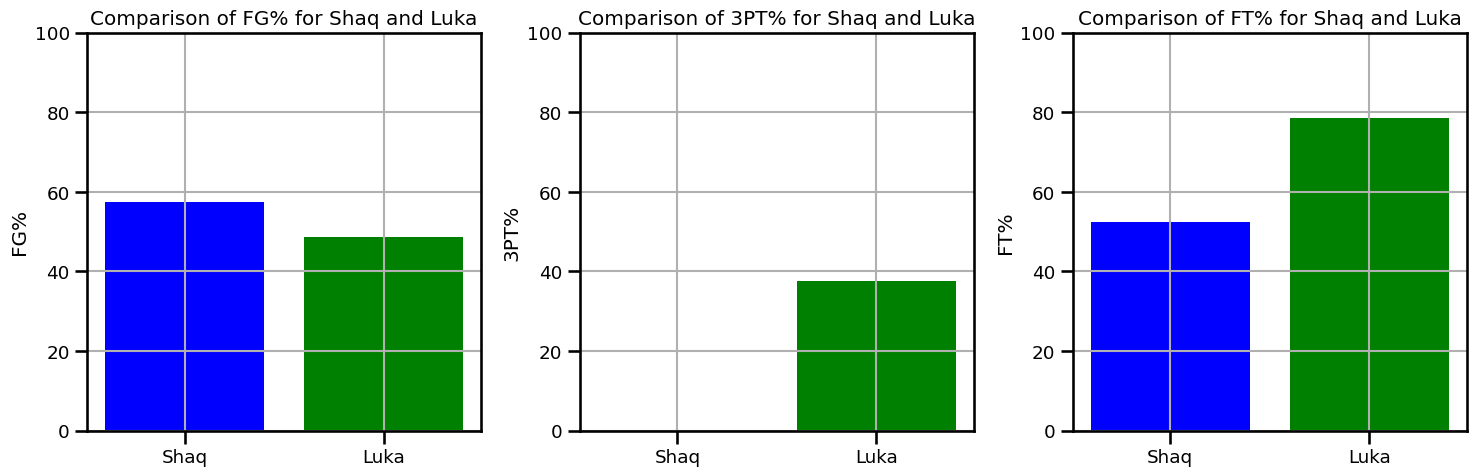

In [89]:
#Get top scorer in 2000 and 2024
top_scorer_2000 = 'Shaquille O\'Neal'
top_scorer_2024 = 'Luka Doncic'

#Get their stats
top_scorer_2000_stats = playerStats_2000[playerStats_2000['player_name'] == top_scorer_2000]
top_scorer_2024_stats = playerStats_2024[playerStats_2024['player_name'] == top_scorer_2024]

#get scoring stats
top_scorer_2000_stats = top_scorer_2000_stats[['field_goal_pct', 'three_point_pct', 'free_throw_pct']]
top_scorer_2024_stats = top_scorer_2024_stats[['field_goal_pct', 'three_point_pct', 'free_throw_pct']]

#x-axis labels
stats_labels = ['FG%', '3PT%', 'FT%']

plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.bar(['Shaq', 'Luka'], [top_scorer_2000_stats.iloc[0, i]*100, top_scorer_2024_stats.iloc[0, i]*100], color=['blue', 'green'])
    plt.ylabel(stats_labels[i])
    plt.title(f'Comparison of {stats_labels[i]} for Shaq and Luka')
    plt.ylim(0, 100)
    plt.grid(True)

plt.tight_layout()
plt.show()

As we can see here, Shaq has a higher FG% than luka. However, that is due to him being a center and playing closer to the rim. Luka's 3PT% is much higher than Shaq's....by a considerable margin. It doesnt seem likely that Shaq has a 0% 3PT%, it just cant be true that the top scorer from a year was so terrible at 3PT shooting. We will examine this further. As we can see Luka is a much better FT shooter than Shaq as well. Based on this initial analysis we can see that the top scorer in 2024 is much more skilled and well-rounded. However, let's further explore the anomaly in Shaq's 3PT shooting:

In [90]:
shaq_stats = playerStats_2000[playerStats_2000['player_name'] == 'Shaquille O\'Neal']
luka_stats = playerStats_2024[playerStats_2024['player_name'] == 'Luka Doncic']

# Check if there are any records for three-point attempts and three-pointers made for Shaq
if not shaq_stats.empty:
    shaq_3pa = shaq_stats['three_pointers_attempted'].sum()
    shaq_3pm = shaq_stats['three_pointers_made'].sum()
    
    # Print Shaq's stats
    print(f"Shaquille O'Neal attempted {shaq_3pa} three-pointers and made {shaq_3pm} of them.")
else:
    print("No records found for Shaquille O'Neal's three-point shooting.")

if not luka_stats.empty:
    luka_3pa = luka_stats['three_pointers_attempted'].sum()
    luka_3pm = luka_stats['three_pointers_made'].sum()
    
    # Print Luka's stats
    print(f"Luka Doncic attempted {luka_3pa} three-pointers and made {luka_3pm} of them.")
else:
    print("No records found for Luka Doncic's three-point shooting.")


Shaquille O'Neal attempted 1.0 three-pointers and made 0.0 of them.
Luka Doncic attempted 660.0 three-pointers and made 248.0 of them.


As we can see, Shaq only attempted one 3 point shot in the 2000 season and did not make it. The fact that he only attempted one 3 point shot back in 2000 as the top scorer in the league shows how far the league has come in terms of 3 point shooting. Players have realised that 3 point shots, even though they are harder, will yield more points even if they shoot worse in terms of %. Which is why you can see players shooting more 3s in the modern game, as shown by the graph below:

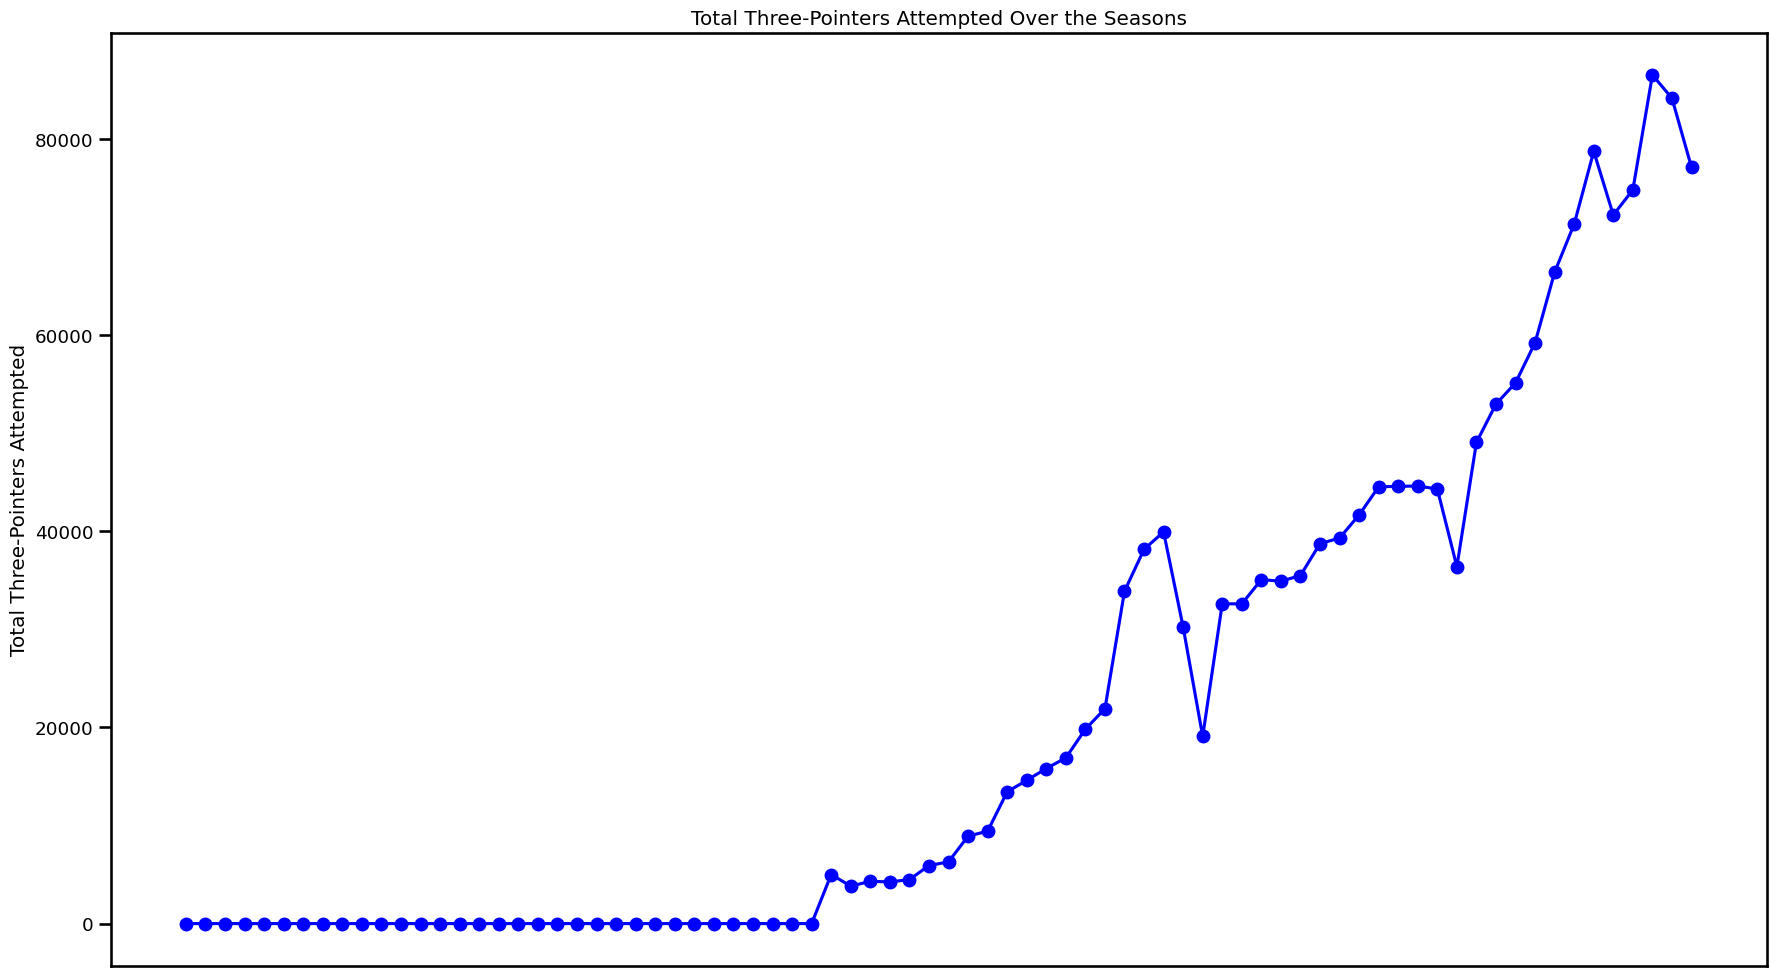

In [91]:
three_pointers_attempted = playerStats.groupby('season')['three_pointers_attempted'].sum()

plt.figure(figsize=(18, 10))
plt.plot(three_pointers_attempted, marker='o', color='b')
plt.title('Total Three-Pointers Attempted Over the Seasons')
plt.xlabel('')  # Set x-axis label to empty
plt.ylabel('Total Three-Pointers Attempted')
plt.grid(False)
plt.xticks([])  # Remove x-axis ticks
plt.tight_layout()
plt.show()

On that note, let us also compare the 3 pointers made and 3pt% over the years:

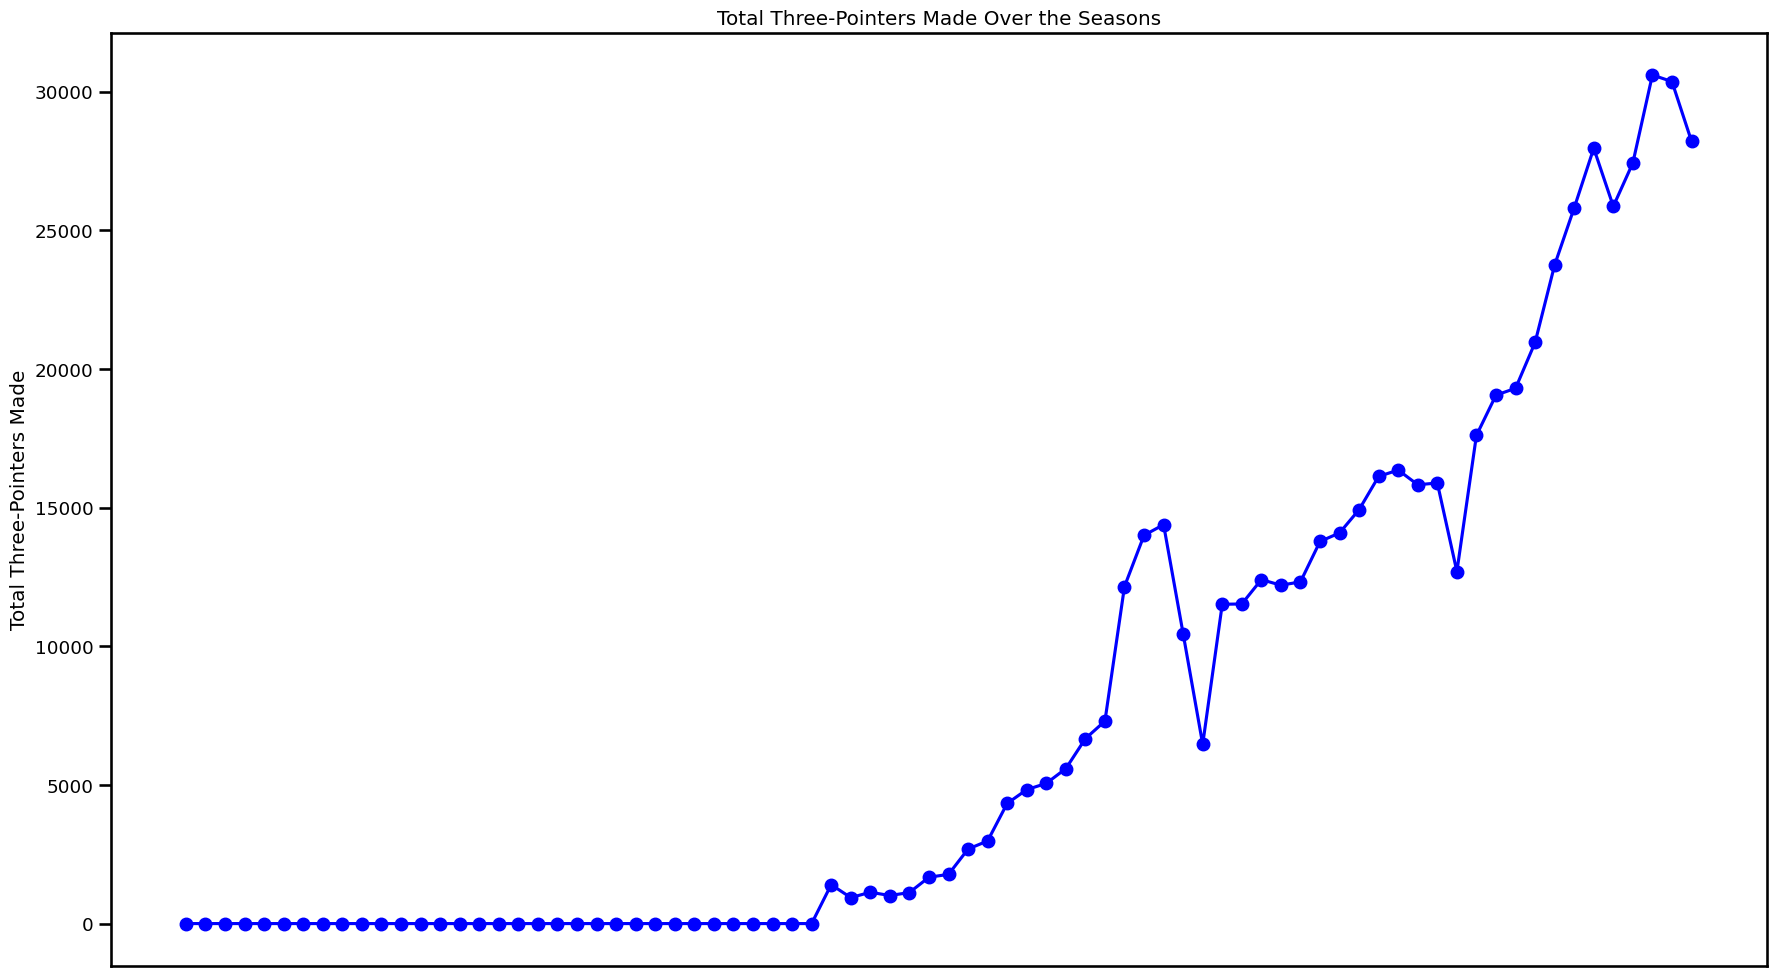

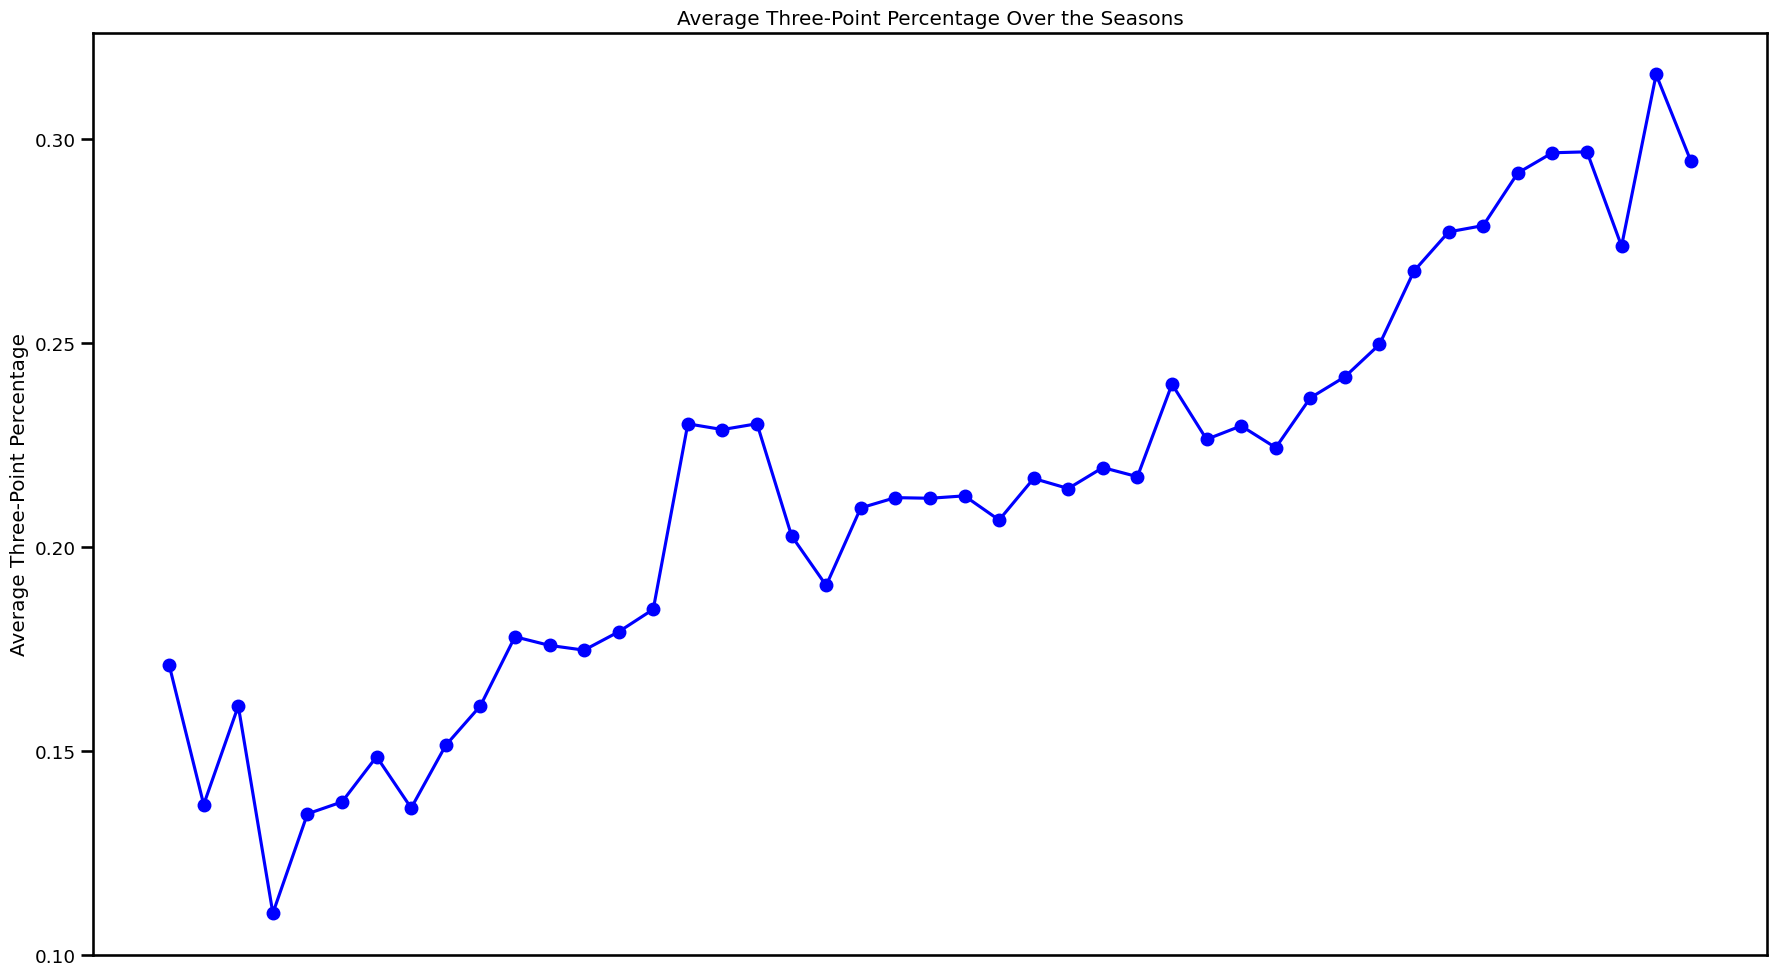

In [142]:
three_pointers_made = playerStats.groupby('season')['three_pointers_made'].sum()

plt.figure(figsize=(18, 10))
plt.plot(three_pointers_made, marker='o', color='b')
plt.title('Total Three-Pointers Made Over the Seasons')
plt.xlabel('')  # Set x-axis label to empty
plt.ylabel('Total Three-Pointers Made')
plt.grid(False)  # Remove gridlines
plt.xticks([])  # Remove x-axis ticks
plt.tight_layout()
plt.show()

three_pointers_percentage = playerStats.groupby('season')['three_point_pct'].mean()

plt.figure(figsize=(18, 10))
plt.plot(three_pointers_percentage, marker='o', color='b')
plt.title('Average Three-Point Percentage Over the Seasons')
plt.xlabel('')  # Set x-axis label to empty
plt.ylabel('Average Three-Point Percentage')
plt.grid(False)  
plt.xticks([])  
plt.tight_layout()
plt.show()

As we can clearly see there is a trend of the 3 point shot becoming more utilised as the years have gone by. Players have also started to make more 3 pointers as the volume of shooting has increased, but we can also see that the percentage of 3 point shots being made is also increased from 26% in 2000 to over 30% in 2024.

Let us compare now the best 3 point shooters across 3 time frames; the 2000s, the 2010s, and the 2020s(so far):

In [93]:
playerStats.loc[:, 'season_start_year'] = playerStats['season'].str.split('-').str[0].astype(int)
playerStats.loc[:, 'season_start_year'] = playerStats['season_start_year'].astype(int)

#2000s data
playerStats_2000s = playerStats[(playerStats['season_start_year'] >= 2000) & (playerStats['season_start_year'] < 2010)].copy()

#average 3-pointers made per game for each player
playerStats_2000s.loc[:, 'avg_3pt_made_per_game'] = playerStats_2000s['three_pointers_made'] / playerStats_2000s['games_played']


#Group by player and calculate the average
player_3pt_stats = playerStats_2000s.groupby('player_name')['avg_3pt_made_per_game'].mean().reset_index()

player_3pt_stats_sorted = round(player_3pt_stats.sort_values(by='avg_3pt_made_per_game', ascending=False), 2)

#top 10 players
top_10_players_3pt_2000s = player_3pt_stats_sorted.head(10)
top_10_players_3pt_2000s

,player_name,avg_3pt_made_per_game
834,Ray Allen,2.70
801,Peja Stojakovic,2.38
827,Rashard Lewis,2.08
946,Stephen Curry,2.08
88,Baron Davis,1.90
555,Juan Carlos Navarro,1.90
387,Gilbert Arenas,1.88
485,Jason Terry,1.86
483,Jason Richardson,1.85
985,Tim Hardaway,1.83


In [94]:
playerStats.loc[:, 'season_start_year'] = playerStats['season'].str.split('-').str[0].astype(int)

playerStats.loc[:, 'season_start_year'] = playerStats['season_start_year'].astype(int)

#2010s data
playerStats_2010s = playerStats[(playerStats['season_start_year'] >= 2010) & (playerStats['season_start_year'] < 2020)].copy()

#average 3-pointers made per game for each player
playerStats_2010s.loc[:, 'avg_3pt_made_per_game'] = playerStats_2010s['three_pointers_made'] / playerStats_2010s['games_played']


#Group by player and calculate the average
player_3pt_stats = playerStats_2010s.groupby('player_name')['avg_3pt_made_per_game'].mean().reset_index()
player_3pt_stats_sorted = round(player_3pt_stats.sort_values(by='avg_3pt_made_per_game', ascending=False), 2)

#top 10 players
top_10_players_3pt_2010s = player_3pt_stats_sorted.head(10)
top_10_players_3pt_2010s

,player_name,avg_3pt_made_per_game
1137,Stephen Curry,3.54
534,James Harden,2.95
244,Damian Lillard,2.92
751,Klay Thompson,2.90
1200,Trae Young,2.67
148,Buddy Hield,2.66
810,Luka Doncic,2.57
230,D'Angelo Russell,2.56
347,Donovan Mitchell,2.44
501,JJ Redick,2.37


In [95]:

playerStats.loc[:, 'season_start_year'] = playerStats['season'].str.split('-').str[0].astype(int)

#dictionary to store top 10 players for each decade
top_10_players_by_decade = {}

#filter + process data for each decade
for start_year in range(2000, 2030, 10):
    end_year = start_year + 10
    decade_label = f'{start_year}s'
    
    decade_data = playerStats.loc[(playerStats['season_start_year'] >= start_year) & (playerStats['season_start_year'] < end_year)].copy()
    
    #average 3-pointers made per game for each player
    decade_data['avg_3pt_made_per_game'] = decade_data['three_pointers_made'] / decade_data['games_played']
    
    player_3pt_stats = decade_data.groupby('player_name')['avg_3pt_made_per_game'].mean().reset_index()
    
    player_3pt_stats_sorted = round(player_3pt_stats.sort_values(by='avg_3pt_made_per_game', ascending=False), 2)
    
    #top 10 players for the decade
    top_10_players = player_3pt_stats_sorted.head(10)
    
    #store the top 10 players for the decade in the dictionary
    top_10_players_by_decade[decade_label] = top_10_players

#top 10 players for each decade
top_10_players_3pt_2000s = top_10_players_by_decade['2000s']
top_10_players_3pt_2010s = top_10_players_by_decade['2010s']
top_10_players_3pt_2020s = top_10_players_by_decade['2020s']

print("Top 10 Players in the 2000s:")
print(top_10_players_3pt_2000s)
print("\nTop 10 Players in the 2010s:")
print(top_10_players_3pt_2010s)
print("\nTop 10 Players in the 2020s:")
print(top_10_players_3pt_2020s)

Top 10 Players in the 2000s:
             player_name  avg_3pt_made_per_game
834            Ray Allen                   2.70
801      Peja Stojakovic                   2.38
827        Rashard Lewis                   2.08
946        Stephen Curry                   2.08
88           Baron Davis                   1.90
555  Juan Carlos Navarro                   1.90
387       Gilbert Arenas                   1.88
485          Jason Terry                   1.86
483     Jason Richardson                   1.85
985         Tim Hardaway                   1.83

Top 10 Players in the 2010s:
           player_name  avg_3pt_made_per_game
1137     Stephen Curry                   3.54
534       James Harden                   2.95
244     Damian Lillard                   2.92
751      Klay Thompson                   2.90
1200        Trae Young                   2.67
148        Buddy Hield                   2.66
810        Luka Doncic                   2.57
230   D'Angelo Russell                   2.56

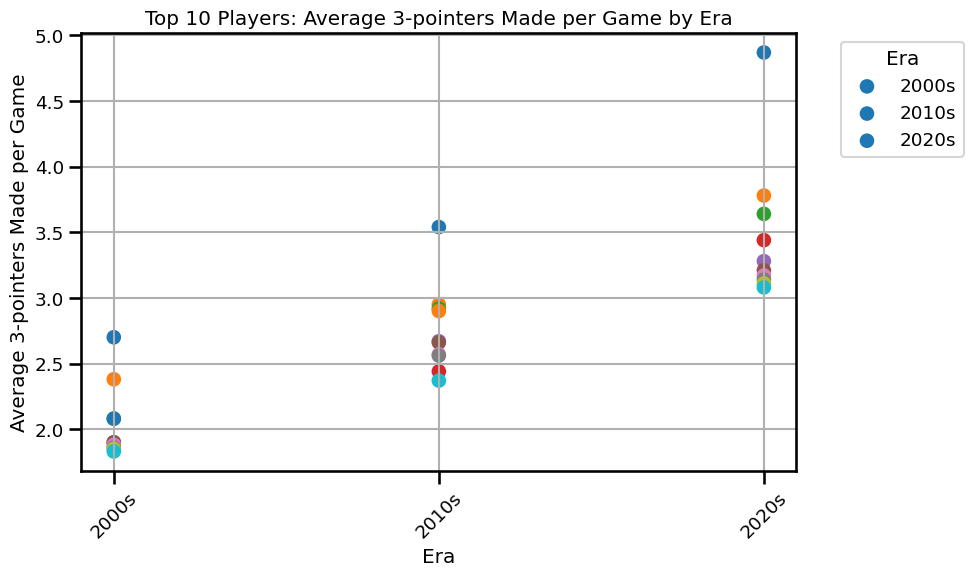

In [96]:

#dictionary to map players to colors
player_color_map = {}

#unique colors to players
for i, player in enumerate(top_10_players_3pt_2000s['player_name']):
    player_color_map[player] = f'C{i}'

for i, player in enumerate(top_10_players_3pt_2010s['player_name']):
    player_color_map[player] = f'C{i+len(top_10_players_3pt_2000s)}'

for i, player in enumerate(top_10_players_3pt_2020s['player_name']):
    player_color_map[player] = f'C{i+len(top_10_players_3pt_2000s)+len(top_10_players_3pt_2010s)}'


#plot
fig, ax = plt.subplots(figsize=(10, 6))

for era, players in zip(['2000s', '2010s', '2020s'], [top_10_players_3pt_2000s, top_10_players_3pt_2010s, top_10_players_3pt_2020s]):
    x_values = [era] * len(players)
    y_values = players['avg_3pt_made_per_game']
    colors = [player_color_map[player] for player in players['player_name']]
    ax.scatter(x_values, y_values, c=colors, label=era)

ax.set_xlabel('Era')
ax.set_ylabel('Average 3-pointers Made per Game')
ax.set_title('Top 10 Players: Average 3-pointers Made per Game by Era')
ax.legend(title='Era', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

As we can clearly see here, the number of 3 points made per game have increased in every era as time has moved on. The increase in 3 point shots made per game has meant that players are scoring more points, and that games have higher scores. Let us see if this is the case:

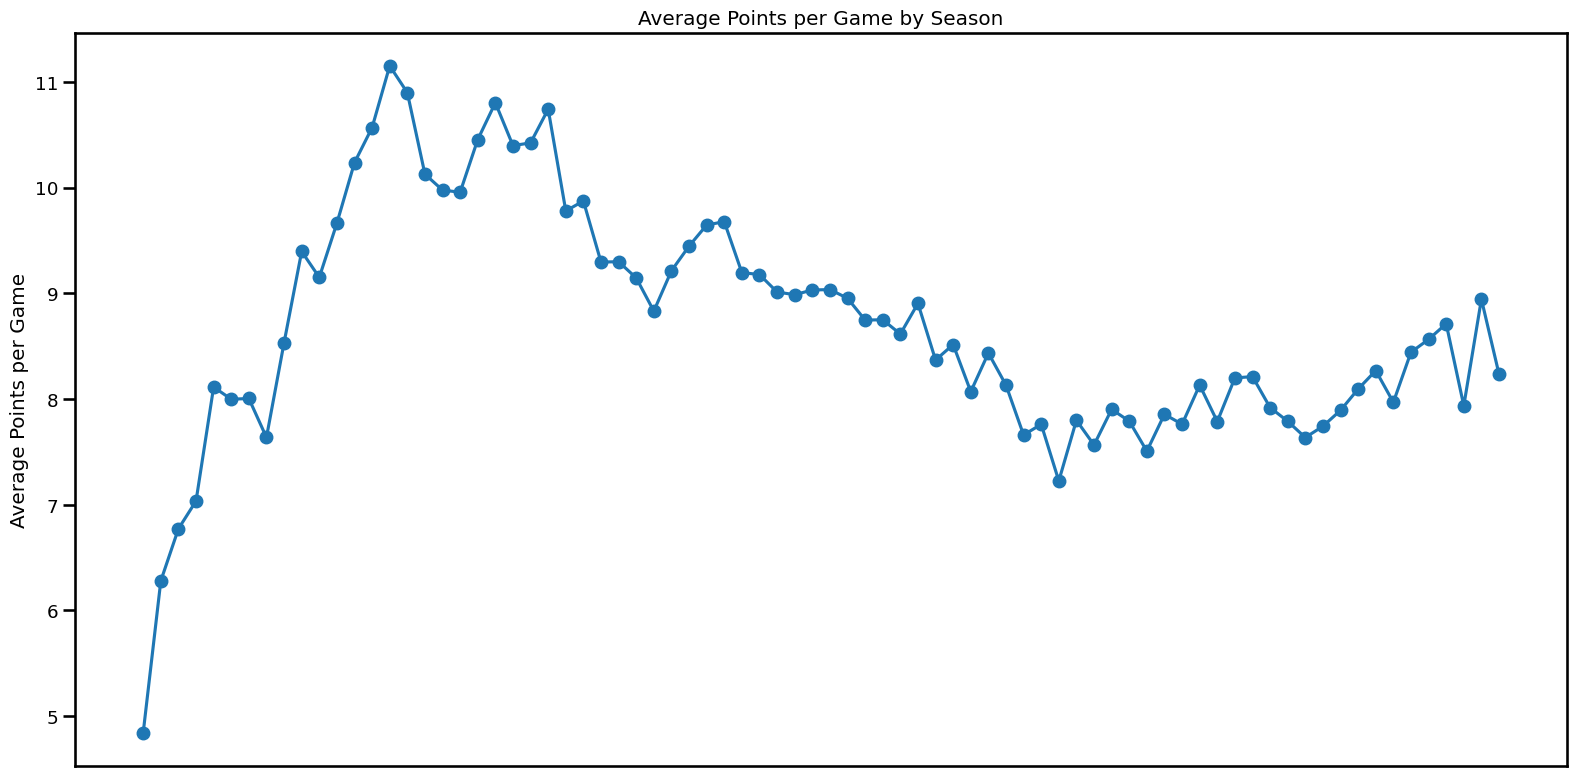

In [152]:

# Calculate PPG for each player in each season
playerStats.loc[:, 'ppg'] = playerStats['points'] / playerStats['games_played']

#group by season and calculate the average PPG for all players in each season
avg_ppg_by_season = playerStats.groupby('season')['ppg'].mean()

#plot
plt.figure(figsize=(16, 8))
plt.plot(avg_ppg_by_season.index, avg_ppg_by_season.values, marker='o', linestyle='-')
plt.title('Average Points per Game by Season')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Average Points per Game')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

This is quite an unexpected result, actually. I expected the Average PPG to increase as time goes on. But it has actually decreased. This could be due to a number of reasons:
Defensive Strategies: Over time, defensive strategies may have become more sophisticated, leading to tighter defense and lower scoring opportunities for players.


1)Rule Changes: Changes in league rules, such as modifications to the shot clock, defensive rules (e.g., hand-checking), or changes in foul regulations, can impact gameplay and scoring.


2)Evolution of Playing Style: The style of play in basketball may have shifted over time, with teams emphasizing different aspects of the game, such as outside shooting, post play, or transition offense, which could affect scoring trends.


3)Athleticism and Conditioning: Improvements in athleticism and conditioning among players may have led to more competitive defense and increased physicality, making it harder for players to score.


4)Three-Point Emphasis: The increasing emphasis on three-point shooting in modern basketball may lead to more attempts from beyond the arc, which generally have a lower shooting percentage compared to two-point field goals, thus potentially lowering overall shooting efficiency and average PPG.


5)Strategic Fouling: Teams may employ intentional fouling strategies, such as the "Hack-a-Shaq" tactic, to disrupt opponents' offensive rhythm and lower their scoring output.


6)Quality of Opposition: As the league grows and talent becomes more evenly distributed across teams, players may face tougher defensive matchups, resulting in lower individual scoring averages.


7)Coaching Strategies: Coaching philosophies and game plans evolve over time, with coaches emphasizing different aspects of the game, such as team defense, ball movement, or balanced scoring, which could impact individual scoring averages.




<br>


Now, enough of players for now, let us look at the 5 teams who have scored the most points of all time, and then compare their trends in points scored over time:

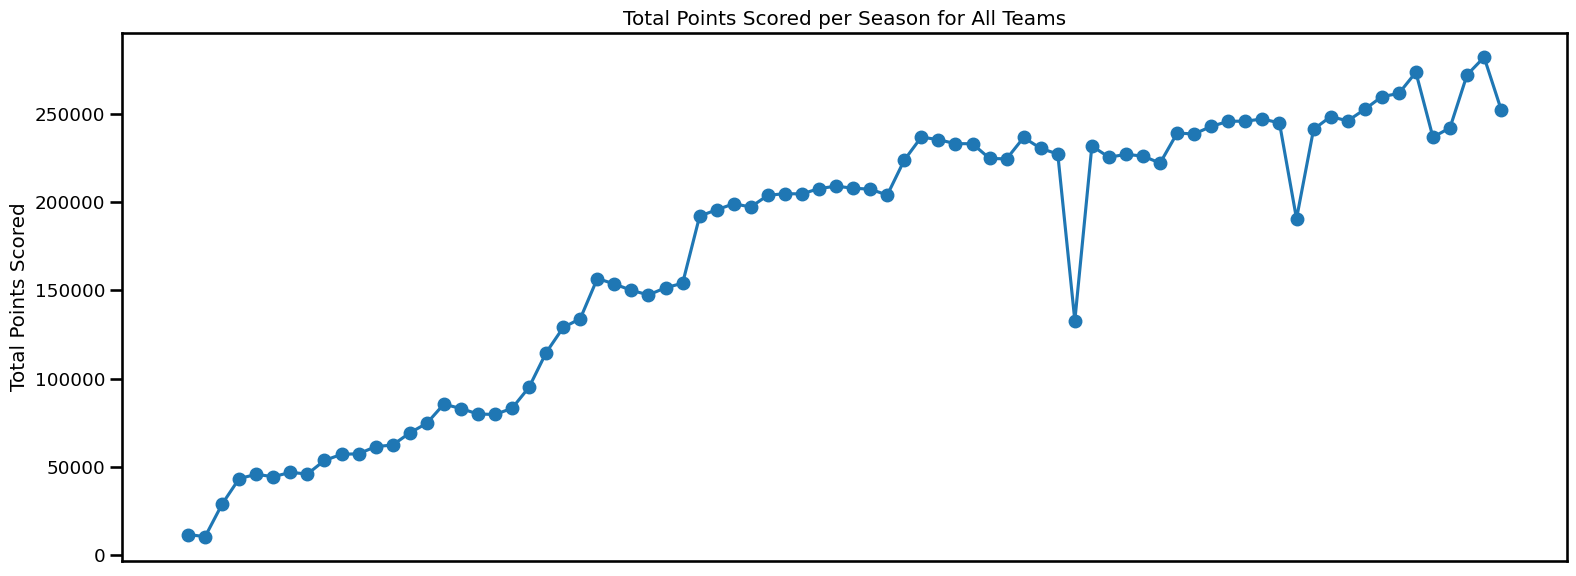

In [143]:
teamStats[['field_goals_made', 'points']] = teamStats[['field_goals_made', 'points']].apply(pd.to_numeric, errors='coerce')

# Group by season and sum the points scored for each season
season_points = teamStats.groupby('season')['points'].sum()

# Plot
plt.figure(figsize=(16, 6))
plt.plot(season_points.index, season_points.values, marker='o', linestyle='-')
plt.title('Total Points Scored per Season for All Teams')
plt.xlabel('')  
plt.ylabel('Total Points Scored')
plt.xticks([])  
plt.grid(False)  
plt.tight_layout()
plt.show()

As expected, we can see that teams scored more points as time goes on. We can definitely see that players got better at scoring, and it's being reflected in the fact that their teams are scoring mroe points. Another thing we can do is to compare the total amount of points scored per game by 2 teams, through our gameStats:

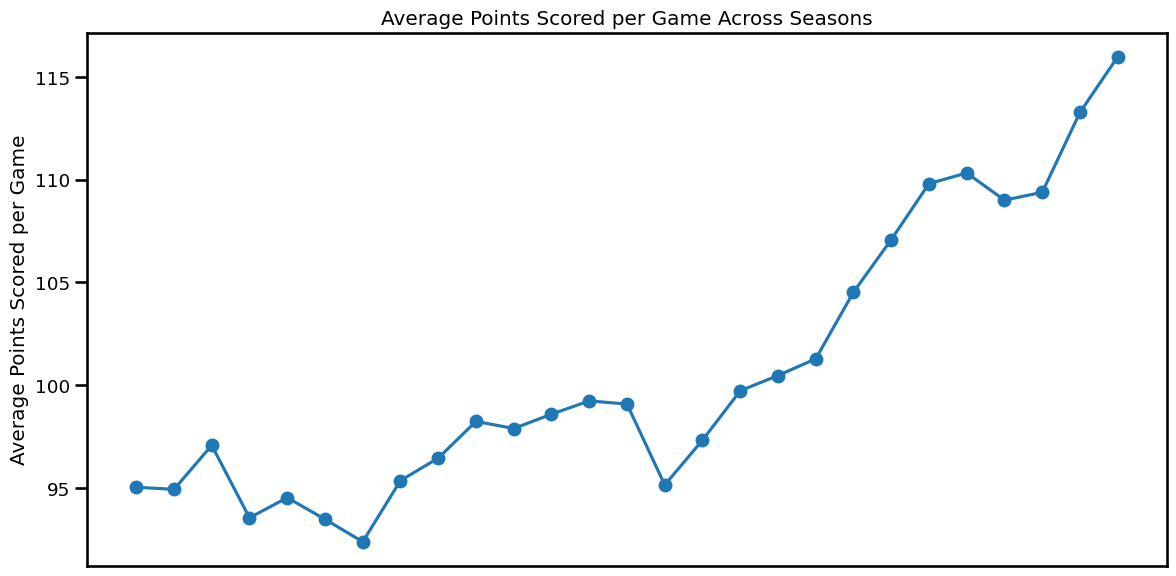

In [153]:
gameData['points'] = pd.to_numeric(gameData['points'], errors='coerce')

#group by season and calculate the average points scored per game
average_points_per_game = gameData.groupby('season')['points'].mean()

#plot 
plt.figure(figsize=(12, 6))
plt.plot(average_points_per_game.index, average_points_per_game.values, marker='o', linestyle='-')
plt.title('Average Points Scored per Game Across Seasons')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Average Points Scored per Game')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

The meteoric rise in points scored by teams starts in the 2015 season. This coincidentally (note the sarcasm) happens to be the time where the Golden State Warriors introduced something called 'Positionless Basketball'. What this means basically is that a player isn't bound to the norms of his position. For example, Centers, who are the biggest players on the team, usually around 7 feet tall, are not terrible 3 point shooters anymore. Before, they could not shoot 3 points, for example we saw with Shaq(a 147kg 7'1 Center) when comparing him to Luka that he attempted only one 3 point shot in a season where he was the top scorer. But now, if we compare him to someone like Brook Lopez(128 kg 7'1 Center), Brook's 3pt stats will surely be much better. Back then, the big men in the team had certain roles, such as Rim Protector, Pick-and-Roll Big, etc. But nowadays they're not bound by their position and can also act as players who stretch the floor due to their shooting abilities. This results in their teammates getting more open shots.

And actually, i dont know why I made the ignorant assumption of Brook Lopez being a better 3pt shooter than Shaq. I must back it up with the data:


In [100]:
brook_lopez_stats = playerStats[playerStats['player_name'] == 'Brook Lopez']
shaq_stats = playerStats[playerStats['player_name'] == 'Shaquille O\'Neal']

#relevant columns for comparison
brook_lopez_3pt_stats = brook_lopez_stats[['player_name', 'three_pointers_made', 'three_pointers_attempted', 'three_point_pct']]
shaq_3pt_stats = shaq_stats[['player_name', 'three_pointers_made', 'three_pointers_attempted', 'three_point_pct']]

#rename the columns for clarity
brook_lopez_3pt_stats.columns = ['Player Name', '3PM', '3PA', '3P%']
shaq_3pt_stats.columns = ['Player Name', '3PM', '3PA', '3P%']

#compare their stats
comparison_df = pd.concat([brook_lopez_3pt_stats, shaq_3pt_stats])

comparison_df.reset_index(drop=True, inplace=True)

comparison_df

,Player Name,3PM,3PA,3P%
0,Brook Lopez,0.0,2.0,0.000
1,Brook Lopez,0.0,2.0,0.000
2,Brook Lopez,0.0,1.0,0.000
3,Brook Lopez,0.0,0.0,0.000
4,Brook Lopez,0.0,1.0,0.000
5,Brook Lopez,0.0,1.0,0.000
6,Brook Lopez,1.0,10.0,0.100
7,Brook Lopez,2.0,14.0,0.143
8,Brook Lopez,134.0,387.0,0.346
9,Brook Lopez,112.0,325.0,0.345


The above table is the perfect representation of how even the bigger players have started to shoot the ball from 3 point range. There are a few points to note, on how the game has changed because of this fact:


1)Floor spacing: Traditionally, centers operated closer to the basket, but with their improved 3-point shooting, they can now stretch the defense by drawing opposing big men out to the perimeter. This creates more space for dribble penetration, cuts, and post-ups for other players on the team.


2)Defensive adjustments: Opposing defenses must adapt to the threat of centers shooting 3-pointers. They may need to assign a quicker defender to contest the shot or switch defensive assignments, which can open up opportunities for mismatches elsewhere on the court.


3)Pick-and-pop effectiveness: Centers who can shoot from beyond the arc effectively become more dangerous in pick-and-pop situations. If defenders sag off to protect the paint, the center can capitalize by knocking down open jump shots.


4)Offensive versatility: Centers who add 3-point shooting to their repertoire become more versatile offensive threats. They can contribute to scoring in various ways, not just through post-ups or offensive rebounds, making them harder to defend.


5)Defensive challenges: Defending centers who can shoot from long range presents challenges for opposing big men. They must decide whether to stay close to contest the shot or protect the rim, potentially leaving shooters open on the perimeter.


6)Transition offense: Centers who can shoot 3-pointers effectively can help their team in transition by trailing the play and providing a trailer option for kick-out passes. This adds an extra dimension to the team's fast-break offense.


7)Strategic adjustments: Coaches may adjust their offensive systems to take advantage of their center's shooting ability. This might involve incorporating more pick-and-pop plays, spacing the floor differently, or running specific sets to create open looks for the center.


8)Roster construction: The ability of centers to shoot from beyond the arc may influence roster construction decisions. Teams may prioritize acquiring or developing big men who can stretch the floor that fit their playstyle and personnel.

<br>


One futher stat we can look at is how much players averaged 20 PPG in different timeframes:

In [101]:


players_1980 = playerStats[playerStats['season'].str.contains('1980')].copy()

# Calculate PPG for each player
players_1980['PPG'] = players_1980['points'] / players_1980['games_played']

#players with average PPG over 20
players_over_20_ppg_1980 = players_1980.groupby('player_name')['PPG'].mean()
players_over_20_ppg_1980 = players_over_20_ppg_1980[players_over_20_ppg_1980 > 20].round(2)

players_over_20_ppg_1980_df = players_over_20_ppg_1980.reset_index()

#sort players by average PPG in descending order
players_over_20_ppg_1980_df = players_over_20_ppg_1980_df.sort_values(by='PPG', ascending=False)

players_over_20_ppg_1980_df.index = range(1, len(players_over_20_ppg_1980_df) + 1)

players_over_20_ppg_1980_df.index.name = 'Rank'
 
print("Players who averaged over 20 PPG in 1980 (Descending order):")
print(players_over_20_ppg_1980_df)

Players who averaged over 20 PPG in 1980 (Descending order):
              player_name    PPG
Rank                            
1          Adrian Dantley  30.65
2            Moses Malone  27.78
3           George Gervin  27.09
4     Kareem Abdul-Jabbar  26.19
5          David Thompson  25.55
6           Otis Birdsong  24.61
7           Julius Erving  24.56
8           Mike Mitchell  24.54
9              World Free  24.08
10           Alex English  23.81
11          Jamaal Wilkes  22.56
12              Dan Issel  21.86
13           Bernard King  21.86
14              John Drew  21.70
15          Magic Johnson  21.57
16            Mike Newlin  21.37
17             Larry Bird  21.23
18       Darrell Griffith  20.63
19        Marques Johnson  20.28
20        Bill Cartwright  20.07


In [102]:

players_2000 = playerStats[playerStats['season'].str.contains('2000')].copy()

# Calculate PPG for each player
players_2000['PPG'] = players_2000['points'] / players_2000['games_played']

#players with average PPG over 20
players_over_20_ppg_2000 = players_2000.groupby('player_name')['PPG'].mean()
players_over_20_ppg_2000 = players_over_20_ppg_2000[players_over_20_ppg_2000 > 20].round(2)

players_over_20_ppg_2000_df = players_over_20_ppg_2000.reset_index()

#sort players by average PPG in descending order
players_over_20_ppg_2000_df = players_over_20_ppg_2000_df.sort_values(by='PPG', ascending=False)

players_over_20_ppg_2000_df.index = range(1, len(players_over_20_ppg_2000_df) + 1)

players_over_20_ppg_2000_df.index.name = 'Rank'

print("Players who averaged over 20 PPG in 2000 :")
print(players_over_20_ppg_2000_df)

Players who averaged over 20 PPG in 2000 :
              player_name    PPG
Rank                            
1           Allen Iverson  31.08
2        Jerry Stackhouse  29.75
3        Shaquille O'Neal  28.72
4             Kobe Bryant  28.50
5            Vince Carter  27.60
6            Chris Webber  27.11
7           Tracy McGrady  26.82
8             Paul Pierce  25.26
9          Antawn Jamison  24.93
10        Stephon Marbury  23.85
11         Antoine Walker  23.36
12            Karl Malone  23.19
13            Gary Payton  23.08
14             Tim Duncan  22.20
15         Glenn Robinson  22.03
16              Ray Allen  22.02
17          Kevin Garnett  22.02
18          Dirk Nowitzki  21.76
19         Michael Finley  21.52
20        Antonio McDyess  20.83
21    Shareef Abdur-Rahim  20.53
22             Jalen Rose  20.53
23        Peja Stojakovic  20.39
24            Elton Brand  20.14
25         Jamal Mashburn  20.11


In [103]:

players_2020 = playerStats[playerStats['season'].str.contains('2020')].copy()

# Calculate PPG for each player
players_2020['PPG'] = players_2020['points'] / players_2020['games_played']

#players with average PPG over 20
players_over_20_ppg_2020 = players_2020.groupby('player_name')['PPG'].mean()
players_over_20_ppg_2020 = players_over_20_ppg_2020[players_over_20_ppg_2020 > 20].round(2)

players_over_20_ppg_2020_df = players_over_20_ppg_2020.reset_index()

#sort players by average PPG in descending order
players_over_20_ppg_2020_df = players_over_20_ppg_2020_df.sort_values(by='PPG', ascending=False)

players_over_20_ppg_2020_df.index = range(1, len(players_over_20_ppg_2020_df) + 1)

players_over_20_ppg_2020_df.index.name = 'Rank'

print("Players who averaged over 20 PPG in 2020 (Descending order):")
print(players_over_20_ppg_2020_df)

Players who averaged over 20 PPG in 2020 (Descending order):
                  player_name    PPG
Rank                                
1               Stephen Curry  31.98
2                Bradley Beal  31.30
3              Damian Lillard  28.78
4                 Joel Embiid  28.45
5       Giannis Antetokounmpo  28.15
6                 Luka Doncic  27.73
7                 Zach LaVine  27.43
8             Zion Williamson  27.00
9                Kevin Durant  26.94
10               Kyrie Irving  26.87
11               Jayson Tatum  26.44
12           Donovan Mitchell  26.43
13               Nikola Jokic  26.36
14               Devin Booker  25.55
15                 Trae Young  25.30
16               De'Aaron Fox  25.19
17               LeBron James  25.02
18              Kawhi Leonard  24.85
19         Karl-Anthony Towns  24.78
20               James Harden  24.67
21               Jaylen Brown  24.66
22              Collin Sexton  24.33
23              Julius Randle  24.11
24            

In [104]:

players_2023 = playerStats[playerStats['season'].str.contains('2023')].copy()

# Calculate PPG for each player
players_2023['PPG'] = players_2023['points'] / players_2023['games_played']

#players with average PPG over 20
players_over_20_ppg_2023 = players_2023.groupby('player_name')['PPG'].mean()
players_over_20_ppg_2023 = players_over_20_ppg_2023[players_over_20_ppg_2023 > 20].round(2)

players_over_20_ppg_2023_df = players_over_20_ppg_2023.reset_index()

#sort players by average PPG in descending order
players_over_20_ppg_2023_df = players_over_20_ppg_2023_df.sort_values(by='PPG', ascending=False)

players_over_20_ppg_2023_df.index = range(1, len(players_over_20_ppg_2023_df) + 1)

players_over_20_ppg_2023_df.index.name = 'Rank'

print("Players who averaged over 20 PPG in 2023 (Descending order):")
print(players_over_20_ppg_2023_df)

Players who averaged over 20 PPG in 2023 (Descending order):
                  player_name    PPG
Rank                                
1                 Joel Embiid  35.32
2                 Luka Doncic  33.80
3       Giannis Antetokounmpo  30.69
4     Shai Gilgeous-Alexander  30.44
5               Jalen Brunson  27.87
6                Kevin Durant  27.57
7                Jayson Tatum  27.32
8            Donovan Mitchell  27.08
9                Devin Booker  26.97
10              Stephen Curry  26.49
11               De'Aaron Fox  26.46
12                 Trae Young  26.35
13            Anthony Edwards  26.17
14               Nikola Jokic  26.14
15               Tyrese Maxey  25.63
16               Kyrie Irving  25.35
17               LeBron James  25.19
18                  Ja Morant  25.11
19              Anthony Davis  24.70
20             Damian Lillard  24.40
21              Julius Randle  23.96
22                LaMelo Ball  23.91
23               Desmond Bane  23.74
24            

Lets make a bar chart to plot the length of each dataframe on the players who averaged over 20 PPG in the timeframe:

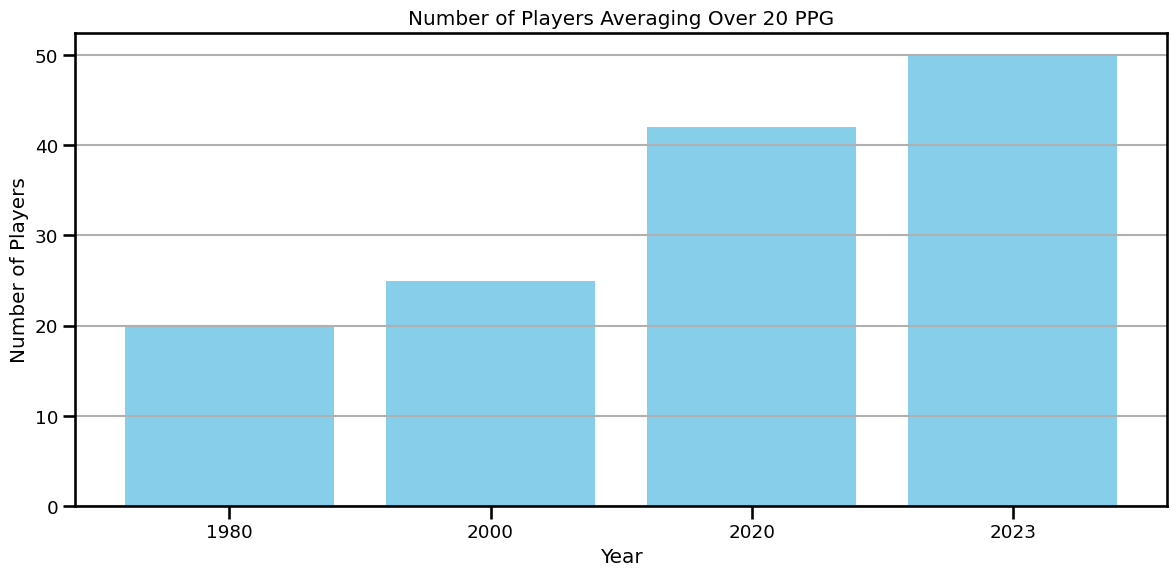

In [105]:
plt.figure(figsize=(12, 6))
plt.bar(['1980', '2000', '2020', '2023'], [len(players_over_20_ppg_1980_df), len(players_over_20_ppg_2000_df), len(players_over_20_ppg_2020_df), len(players_over_20_ppg_2023_df)], color='skyblue')
plt.title('Number of Players Averaging Over 20 PPG')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Back in the day(2000-2010), to be considered an All-Star, you needed to have at least 20 PPG. But in today's game, you need to average at least 20 PPG to be considered a half decent player. The standards of the NBA have gotten much higher. Alot of players are averaging over 20 PPG and this means that players are just getting more skilled. ***BUT***...could it be due to the fact that players are getting worse at defence....?

<br>  


Lets find out if the average blocks and steals per season have decreased or increased, and their correlation with PPG:

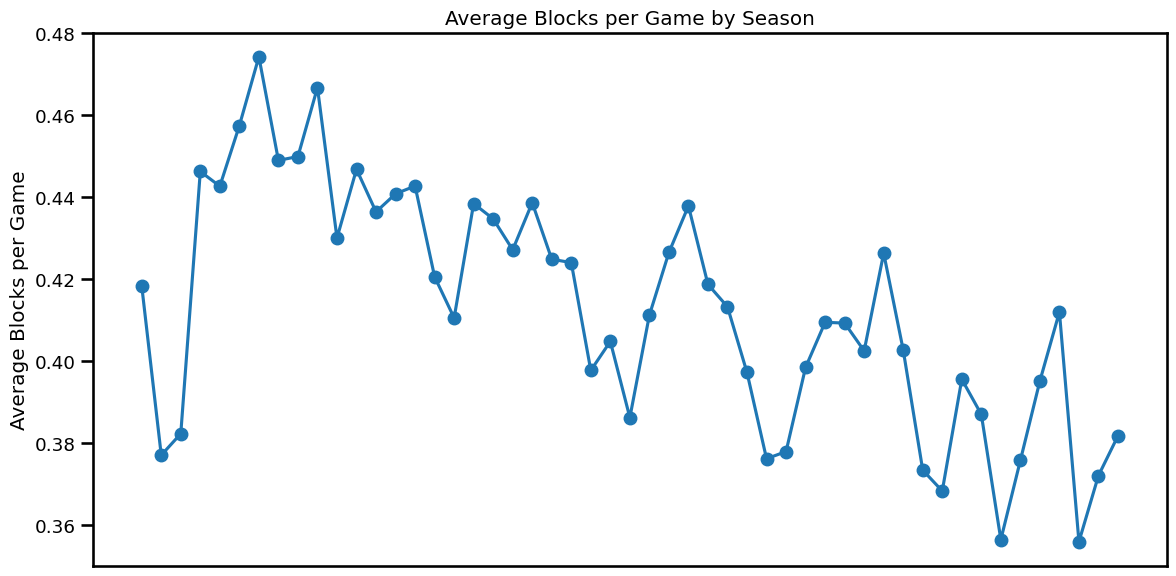

In [148]:
playerStats = playerStats.copy()

playerStats[['blocks', 'games_played']] = playerStats[['blocks', 'games_played']].apply(pd.to_numeric, errors='coerce')

# Calculate blocks per game (BPG) for each player
playerStats['bpg'] = playerStats['blocks'] / playerStats['games_played']

#group by season and calculate the average BPG for all players in each season
avg_bpg_by_season = playerStats.groupby('season')['bpg'].mean()

#plot
plt.figure(figsize=(12, 6))
plt.plot(avg_bpg_by_season.index, avg_bpg_by_season.values, marker='o', linestyle='-')
plt.title('Average Blocks per Game by Season')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Average Blocks per Game')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

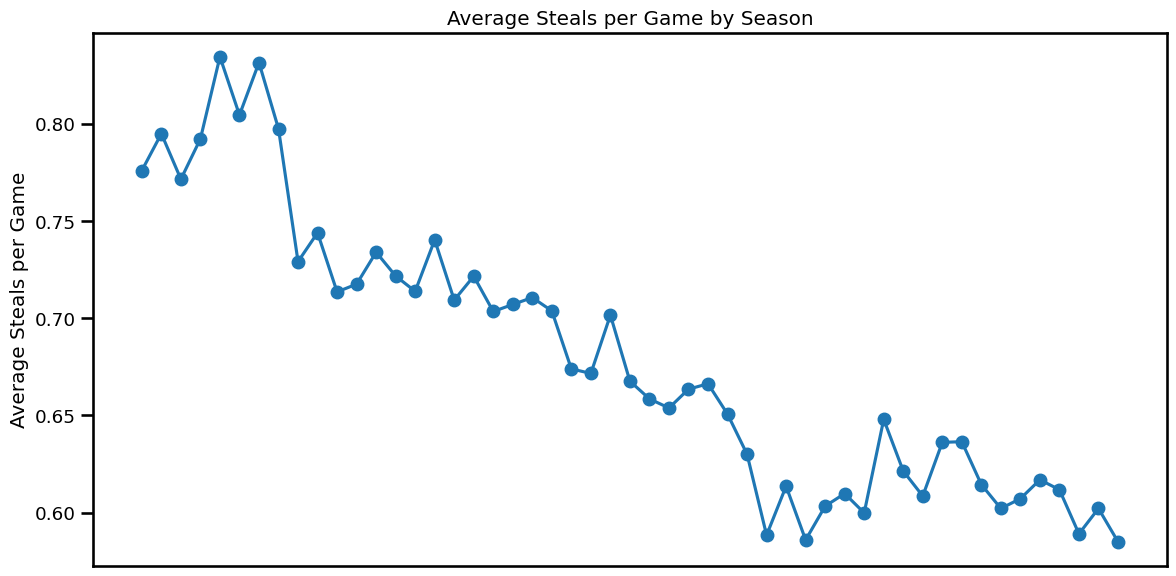

In [154]:
playerStats = playerStats.copy()

# Convert relevant columns to numeric
playerStats[['steals', 'games_played']] = playerStats[['steals', 'games_played']].apply(pd.to_numeric, errors='coerce')

# Calculate steals per game (SPG) for each player
playerStats['spg'] = playerStats['steals'] / playerStats['games_played']

# Group by season and calculate the average SPG for all players in each season
avg_spg_by_season = playerStats.groupby('season')['spg'].mean()

# Plotting average steals per game across seasons
plt.figure(figsize=(12, 6))
plt.plot(avg_spg_by_season.index, avg_spg_by_season.values, marker='o', linestyle='-')
plt.title('Average Steals per Game by Season')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Average Steals per Game')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

As we can see, the average blocks and steals per game has gone down through the years. But does this really mean that the offense has gotten better? Is it a case of offensive strategies having become more sophisticated, leading to better ball movement, spacing, and scoring opportunities. As a result, defensive players could find it more challenging to make successful blocks and steals. Or is it a case of players becoming more careful due to stricter rules? With advancements in sports science and conditioning, players may prioritize maintaining their physical health and avoiding injuries. As a result, they may focus more on playing disciplined defense to prevent fouls or risky defensive maneuvers that could lead to injuries.

Lets just combine the Steals and Blocks into one stat called STOCKs and plot it for every season:

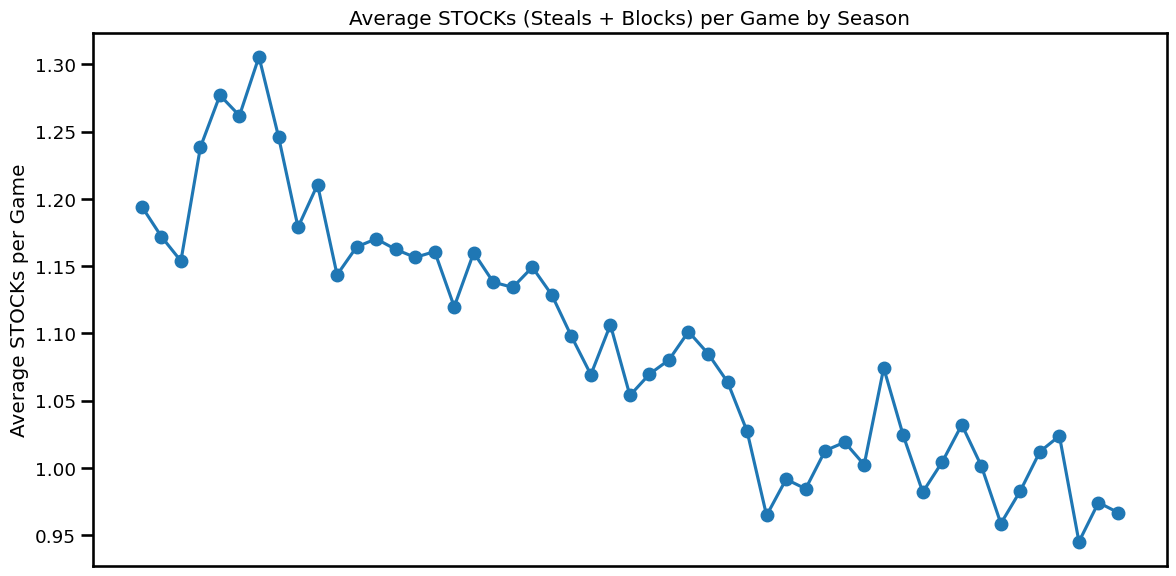

In [155]:
playerStats[['blocks', 'steals', 'games_played']] = playerStats[['blocks', 'steals', 'games_played']].apply(pd.to_numeric, errors='coerce')
playerStats.loc[:, 'stocks'] = (playerStats['blocks'] + playerStats['steals']) / playerStats['games_played']
avg_stocks_by_season = playerStats.groupby('season')['stocks'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_stocks_by_season.index, avg_stocks_by_season.values, marker='o', linestyle='-')
plt.title('Average STOCKs (Steals + Blocks) per Game by Season')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Average STOCKs per Game')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

check personal fouls correlation with steals and blocks, and PPG with steals and blocks:

In [109]:
playerStats[['personal_fouls', 'stocks']] = playerStats[['personal_fouls', 'stocks']].apply(pd.to_numeric, errors='coerce')
correlation_pf_stocks = playerStats['personal_fouls'].corr(playerStats['stocks'])
print("Correlation between Personal Fouls and STOCKs per Game:", round(correlation_pf_stocks, 2))



Correlation between Personal Fouls and STOCKs per Game: 0.65


This value indicates a moderately positive linear relationship between Personal Fouls and STOCKs. For context,

<br>

Personal Fouls: These are infractions committed by players that result in an opponent being awarded free throws or the ball being given to the opposing team. It often indicates aggressive defensive play or mistakes in defensive positioning.

<br>

With a correlation coefficient of 0.63:

1)There is a notable positive relationship between personal fouls and STOCKs per game. This suggests that players who are more active defensively (accumulating more steals and blocks) tend to commit more personal fouls.


2)However, the strength of the relationship is not extremely high, indicating that other factors may also influence personal fouls, and it's not solely dependent on defensive activity.


3)Overall, it implies that there is a tendency for players who are more involved in defensive actions to also incur more personal fouls, but the relationship is not absolute, and other factors likely contribute to the number of personal fouls committed by players.









In [110]:
correlation_ppg_stocks = playerStats['ppg'].corr(playerStats['stocks'])
print("Correlation between PPG and STOCKs per Game:", round(correlation_ppg_stocks, 2))


Correlation between PPG and STOCKs per Game: 0.66


This value suggests a moderate to strong positive relationship between a player's offensive scoring output and their defensive activity.

<br>


With a correlation coefficient of 0.65:

1)There is a notable positive relationship between a player's offensive scoring output (PPG) and their defensive activity (STOCKs per game). This suggests that players who score more points tend to also be more active on the defensive end, accumulating more steals and blocks.


2)However, while the correlation is moderate to strong, it's not perfect, indicating that other factors may also influence a player's scoring and defensive performance independently.


3)Overall, it implies that there is a tendency for players who excel offensively to also contribute significantly on the defensive end, but the relationship is not absolute, and other factors may also play a role in determining a player's offensive and defensive contributions.

<br>


Now let us see how playmakers have fared over the years. In this we will mostly be looking at their Assists per game and their ratios, as well as their ability to be safe ball handlers.


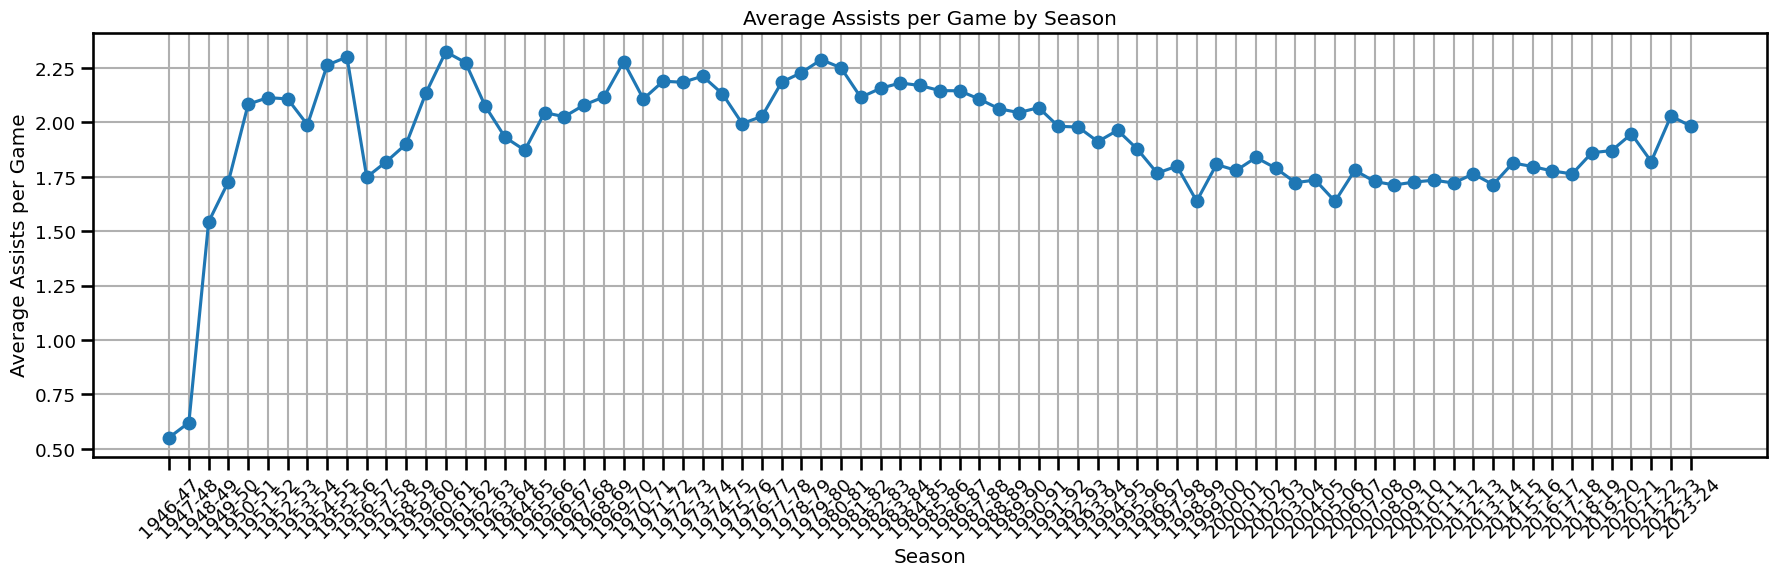

In [111]:
playerStats[['assists', 'games_played']] = playerStats[['assists', 'games_played']].apply(pd.to_numeric, errors='coerce')
playerStats.loc[:, 'apg'] = playerStats['assists'] / playerStats['games_played']
avg_apg_by_season = playerStats.groupby('season')['apg'].mean()

plt.figure(figsize=(18, 6))
plt.plot(avg_apg_by_season.index, avg_apg_by_season.values, marker='o', linestyle='-')
plt.title('Average Assists per Game by Season')
plt.xlabel('Season')
plt.ylabel('Average Assists per Game')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


We can see that over time, it has certainly improved, but let's go a bit deeper and see the top 10 assisters in different seasons:

In [112]:
#get the top 10 players with highest APG in 1980
playerStats_1980 = playerStats[playerStats['season'] == '1979-80'].copy()
playerStats_1980.loc[:, 'apg'] = playerStats_1980['assists'] / playerStats_1980['games_played']
top_10_players_1980_apg = playerStats_1980.groupby('player_name')['apg'].mean().sort_values(ascending=False).head(10).reset_index()
print(top_10_players_1980_apg)


average_apg_1980 = top_10_players_1980_apg['apg'].mean()
print("The average APG of the top 10 players in 1980 is:", round(average_apg_1980, 2))


              player_name        apg
0  Micheal Ray Richardson  10.146341
1          Nate Archibald   8.387500
2            Foots Walker   7.986842
3              Norm Nixon   7.829268
4              John Lucas   7.525000
5               Phil Ford   7.439024
6           Magic Johnson   7.311688
7          Maurice Cheeks   7.037975
8            Eddie Jordan   6.792683
9            Kevin Porter   6.528571
The average APG of the top 10 players in 1980 is: 7.7


In [113]:
#get the top 10 players with highest APG in 2000
playerStats_2000 = playerStats[playerStats['season'] == '1999-00'].copy()
playerStats_2000.loc[:, 'apg'] = playerStats_2000['assists'] / playerStats_2000['games_played']
top_10_players_2000_apg = playerStats_2000.groupby('player_name')['apg'].mean().sort_values(ascending=False).head(10).reset_index()
print(top_10_players_2000_apg)


average_apg_2000 = top_10_players_2000_apg['apg'].mean()
print("The average APG of the top 10 players in 2000 is:", round(average_apg_2000, 2))



       player_name        apg
0       Jason Kidd  10.119403
1    Nick Van Exel   9.037975
2      Sam Cassell   9.000000
3      Gary Payton   8.926829
4  Terrell Brandon   8.859155
5    John Stockton   8.573171
6  Stephon Marbury   8.405405
7       Mike Bibby   8.109756
8     Mark Jackson   8.024691
9        Eric Snow   7.609756
The average APG of the top 10 players in 2000 is: 8.67


In [114]:
#get the top 10 players with highest APG in 2010
playerStats_2010 = playerStats[playerStats['season'] == '2009-10'].copy()
playerStats_2010.loc[:, 'apg'] = playerStats_2010['assists'] / playerStats_2010['games_played']
top_10_players_2010_apg = playerStats_2010.groupby('player_name')['apg'].mean().sort_values(ascending=False).head(10).reset_index()
print(top_10_players_2010_apg)

average_apg_2010 = top_10_players_2010_apg['apg'].mean()
print("The average APG of the top 10 players in 2010 is:", round(average_apg_2010, 2))



         player_name        apg
0         Steve Nash  11.012346
1         Chris Paul  10.666667
2     Deron Williams  10.500000
3        Rajon Rondo   9.802469
4         Jason Kidd   9.050000
5       LeBron James   8.565789
6        Baron Davis   7.973333
7  Russell Westbrook   7.951220
8     Gilbert Arenas   7.187500
9       Devin Harris   6.609375
The average APG of the top 10 players in 2010 is: 8.93


In [115]:
#get the top 10 players with highest APG in 2024
playerStats_2024 = playerStats[playerStats['season'] == '2023-24'].copy()
playerStats_2024.loc[:, 'apg'] = playerStats_2024['assists'] / playerStats_2024['games_played']
top_10_players_2024_apg = playerStats_2024.groupby('player_name')['apg'].mean().sort_values(ascending=False).head(10).reset_index()
print(top_10_players_2024_apg)


average_apg_2024 = top_10_players_2024_apg['apg'].mean()
print("The average APG of the top 10 players in 2024 is:", round(average_apg_2024, 2))

         player_name        apg
0  Tyrese Haliburton  11.000000
1         Trae Young  10.843137
2        Luka Doncic   9.828125
3       Nikola Jokic   8.929577
4       James Harden   8.530303
5   Domantas Sabonis   8.342466
6       LeBron James   8.140625
7          Ja Morant   8.111111
8      Fred VanVleet   8.106061
9        LaMelo Ball   8.000000
The average APG of the top 10 players in 2024 is: 8.98


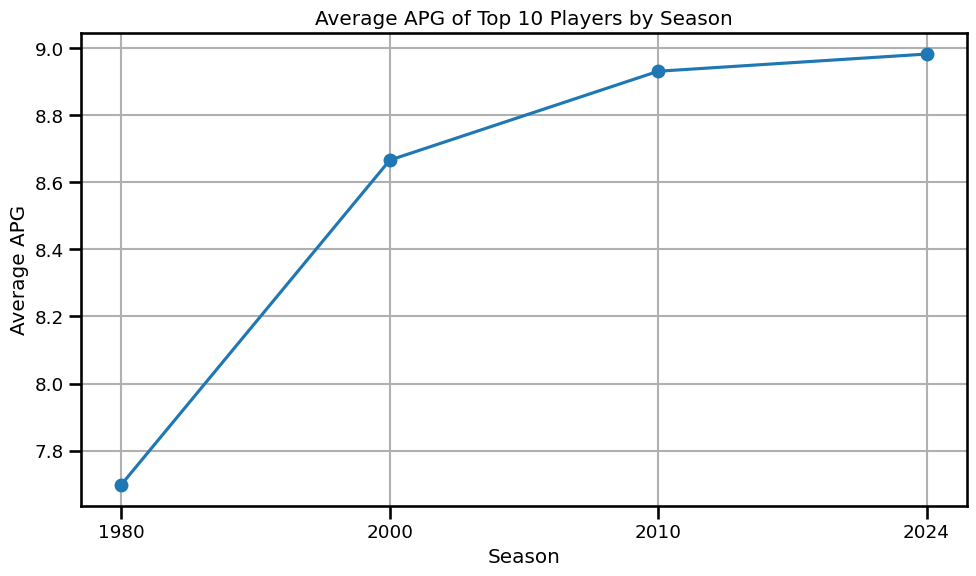

In [116]:
#seasons and their average APGs
seasons = ['1980', '2000', '2010', '2024']
average_apgs = [average_apg_1980, average_apg_2000, average_apg_2010, average_apg_2024]

plt.figure(figsize=(10, 6))
plt.plot(seasons, average_apgs, marker='o', linestyle='-')
plt.title('Average APG of Top 10 Players by Season')
plt.xlabel('Season')
plt.ylabel('Average APG')
plt.grid(True)
plt.tight_layout()
plt.show()

From our initial assists stats analysis, we can definitely see that playmakers have also gotten better over time. However its now time to go into some other playmaking stats. We will be looking at the Assist-Turnover ratio now, which is a player’s assists in context with their turnovers.

A higher AST/TO can mean more ball control. A lower number can mean less ball control.

In [117]:

#calculate AST/TO ratio for each player
playerStats['ast_to_ratio'] = playerStats['assists'] / playerStats['turnovers']

#1980 stats
playerStats_1980 = playerStats[playerStats['season'] == '1979-80']

#remove players with infinite AST/TO ratio
playerStats_1980 = playerStats_1980[np.isfinite(playerStats_1980['ast_to_ratio'])]

#top 10 players with the highest AST/TO ratio
top_10_players_1980_ast_to = playerStats_1980.groupby('player_name')['ast_to_ratio'].mean().sort_values(ascending=False).head(10).reset_index()

print("Top 10 players with the highest AST/TO ratio in 1980:")
print(top_10_players_1980_ast_to)

#average AST/TO ratio for the top 10 players
average_ast_to_1980 = top_10_players_1980_ast_to['ast_to_ratio'].mean()
print("The average AST/TO ratio of the top 10 players in 1980 is:", round(average_ast_to_1980, 2))

Top 10 players with the highest AST/TO ratio in 1980:
      player_name  ast_to_ratio
0    Robert Smith      4.317308
1    Foots Walker      3.866242
2        Don Buse      3.516484
3      John Lucas      3.271739
4    John Kuester      3.200000
5      Brad Davis      2.878788
6    Kevin Porter      2.786585
7  Billy McKinney      2.786517
8  Nate Archibald      2.772727
9    Willie Smith      2.726316
The average AST/TO ratio of the top 10 players in 1980 is: 3.21


In [118]:

# Calculate AST/TO ratio for each player
playerStats['ast_to_ratio'] = playerStats['assists'] / playerStats['turnovers']

#2000 stats
playerStats_2000 = playerStats[playerStats['season'] == '1999-00']

#remove players with infinite AST/TO ratio
playerStats_2000 = playerStats_2000[np.isfinite(playerStats_2000['ast_to_ratio'])]

#top 10 players with the highest AST/TO ratio
top_10_players_2000_ast_to = playerStats_2000.groupby('player_name')['ast_to_ratio'].mean().sort_values(ascending=False).head(10).reset_index()

print("Top 10 players with the highest AST/TO ratio in 2000:")
print(top_10_players_2000_ast_to)

#average AST/TO ratio for the top 10 players
average_ast_to_2000 = top_10_players_2000_ast_to['ast_to_ratio'].mean()
print("Average AST/TO ratio of the top 10 players in 2000:", round(average_ast_to_2000, 2))


Top 10 players with the highest AST/TO ratio in 2000:
        player_name  ast_to_ratio
0     Matt Harpring      8.000000
1     Muggsy Bogues      5.067797
2       Kevin Ollie      4.600000
3   Michael Hawkins      4.333333
4        Tim Legler      4.000000
5     John Stockton      3.927374
6         Eric Snow      3.851852
7      Mark Jackson      3.735632
8  Haywoode Workman      3.696429
9     Avery Johnson      3.507143
Average AST/TO ratio of the top 10 players in 2000: 4.47


In [119]:

#calculate AST/TO ratio for each player
playerStats['ast_to_ratio'] = playerStats['assists'] / playerStats['turnovers']

#2010 stats
playerStats_2010 = playerStats[playerStats['season'] == '2009-10']

#remove players with infinite AST/TO ratio
playerStats_2010 = playerStats_2010[np.isfinite(playerStats_2010['ast_to_ratio'])]

#top 10 players with the highest AST/TO ratio for the 2010 season
top_10_players_2010_ast_to = playerStats_2010.groupby('player_name')['ast_to_ratio'].mean().sort_values(ascending=False).head(10).reset_index()

average_ast_to_top_10_2010 = top_10_players_2010_ast_to['ast_to_ratio'].mean()

print("Top 10 players with the highest AST/TO ratio in 2010:")
print(top_10_players_2010_ast_to)

#average AST/TO ratio for the top 10 players
print("Average AST/TO ratio for the top 10 players in 2010:", round(average_ast_to_top_10_2010, 2))

Top 10 players with the highest AST/TO ratio in 2010:
      player_name  ast_to_ratio
0      Chris Paul      4.285714
1   Carlos Arroyo      4.166667
2   Tracy McGrady      4.081395
3   Jose Calderon      4.080808
4      Jason Kidd      3.712821
5      Mike Bibby      3.444444
6     Chris Duhon      3.436364
7  Brian Cardinal      3.428571
8  Jason Williams      3.425287
9     Luke Walton      3.333333
Average AST/TO ratio for the top 10 players in 2010: 3.74


In [120]:

#2024 stats
playerStats_2024 = playerStats[playerStats['season'] == '2023-24']

#remove players with infinite AST/TO ratio
playerStats_2024 = playerStats_2024[np.isfinite(playerStats_2024['ast_to_ratio'])]

#top 10 players with the highest AST/TO ratio for the 2024 season
top_10_players_2024_ast_to = playerStats_2024.groupby('player_name')['ast_to_ratio'].mean().sort_values(ascending=False).head(10).reset_index()

#average AST/TO ratio for the top 10 players in the 2024 season
average_ast_to_top_10_2024 = top_10_players_2024_ast_to['ast_to_ratio'].mean()

print("Top 10 players with the highest AST/TO ratio in 2024:")
print(top_10_players_2024_ast_to)

#average AST/TO ratio for the top 10 players
print("Average AST/TO ratio for the top 10 players in 2024:", round(average_ast_to_top_10_2024, 2))

Top 10 players with the highest AST/TO ratio in 2024:
         player_name  ast_to_ratio
0       Delon Wright     14.727273
1        Braxton Key      9.000000
2       Monte Morris      7.625000
3       Gabe Vincent      7.500000
4         Tyus Jones      7.348485
5      Isaiah Mobley      6.000000
6       Kobi Simmons      6.000000
7         Chris Paul      5.683333
8  Jordan McLaughlin      5.666667
9        Sam Merrill      5.555556
Average AST/TO ratio for the top 10 players in 2024: 7.51


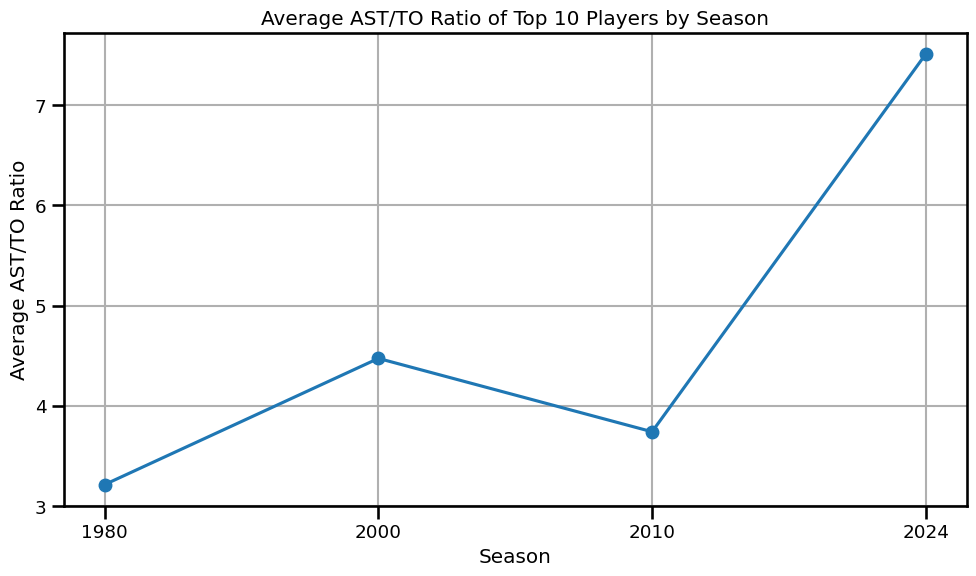

In [121]:
#plot the average AST/TO ratio for the top 10 players in each season
seasons = ['1980', '2000', '2010', '2024']
average_ast_to_ratios = [average_ast_to_1980, average_ast_to_2000, average_ast_to_top_10_2010, average_ast_to_top_10_2024]

plt.figure(figsize=(10, 6))
plt.plot(seasons, average_ast_to_ratios, marker='o', linestyle='-')
plt.title('Average AST/TO Ratio of Top 10 Players by Season')
plt.xlabel('Season')
plt.ylabel('Average AST/TO Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


The above graph also further backs the point that playmakers have gotten better over time, we can see that players have become safer ball handlers as well. Overall, we can conclude from this that the level of playmakers have also gotten better over time. 

<br>

Another interesting thing we can do is look at players in our college dataset. These players have interesting physical stats available, which we will now be analysing:

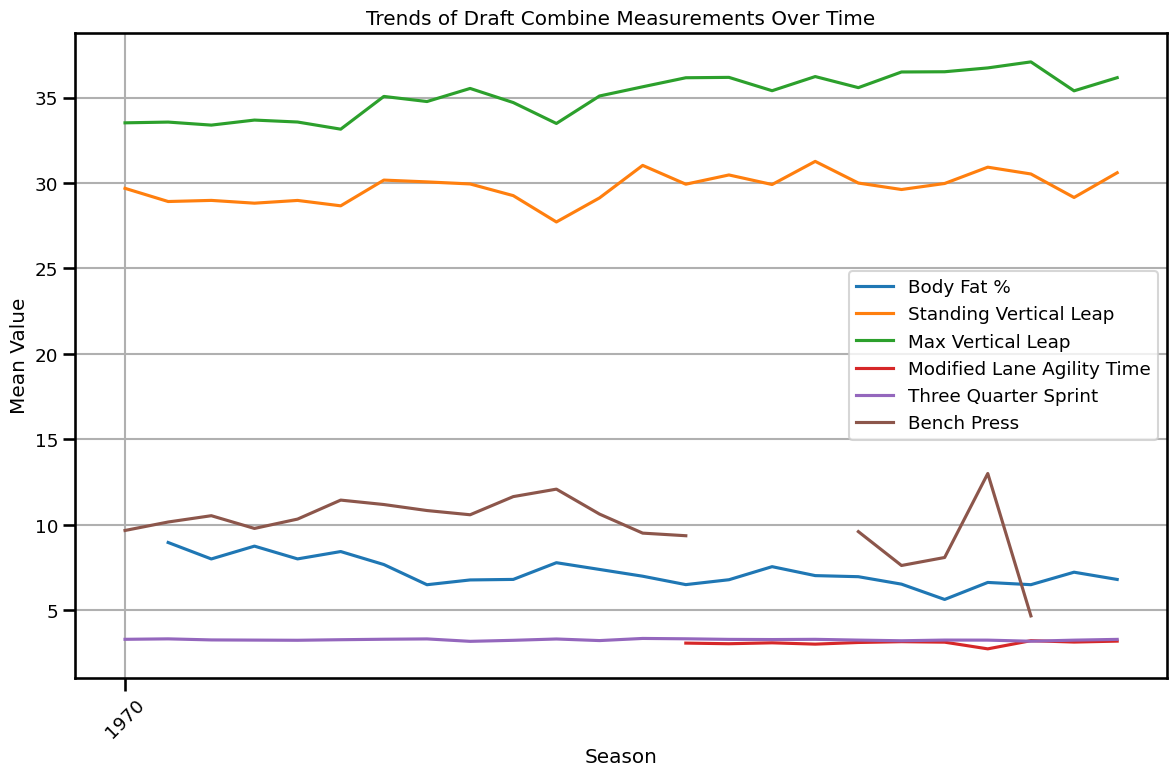

In [122]:

draftData['season'] = pd.to_datetime(draftData['season'])

mean_values_by_season = draftData.groupby('season').agg({
    'body_fat_pct': 'mean',
    'standing_vertical_leap': 'mean',
    'max_vertical_leap': 'mean',
    'modified_lane_agility_time': 'mean',
    'three_quarter_sprint': 'mean',
    'bench_press': 'mean'
}).reset_index()

#plotting trends over time
plt.figure(figsize=(12, 8))

plt.plot(mean_values_by_season['season'], mean_values_by_season['body_fat_pct'], label='Body Fat %')
plt.plot(mean_values_by_season['season'], mean_values_by_season['standing_vertical_leap'], label='Standing Vertical Leap')
plt.plot(mean_values_by_season['season'], mean_values_by_season['max_vertical_leap'], label='Max Vertical Leap')
plt.plot(mean_values_by_season['season'], mean_values_by_season['modified_lane_agility_time'], label='Modified Lane Agility Time')
plt.plot(mean_values_by_season['season'], mean_values_by_season['three_quarter_sprint'], label='Three Quarter Sprint')
plt.plot(mean_values_by_season['season'], mean_values_by_season['bench_press'], label='Bench Press')

plt.title('Trends of Draft Combine Measurements Over Time')
plt.xlabel('Season')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

***Max Vertical Leap:***


1)***Trend***: The trend of the max vertical leap shows fluctuations over time, starting around 34 in 1970 and ending around 36. There are periods of increase and decrease throughout the years, but overall, there is a slight upward trend.


2)***Implications***: The fluctuations in the max vertical leap could be influenced by various factors such as changes in training techniques, advancements in sports science, and improvements in athletic gear. It may also reflect shifts in the demographic of players entering the draft combine, with some years seeing a higher proportion of players with exceptional leaping abilities.


3)***Reasons***: Improvements in strength and conditioning programs, as well as advancements in sports technology, could contribute to the overall increase in max vertical leap over time. Additionally, changes in player recruitment strategies by teams and increased emphasis on athleticism in basketball could also impact the trend.


<br>


***Standing Vertical Leap:***


1)***Trend***: The standing vertical leap shows a fluctuating trend, starting just below 30 in 1970, dropping to 28 at one point, and ending around 31. There are fluctuations throughout the years, but the trend remains relatively stable.


2)***Implications***: The fluctuations in the standing vertical leap could be influenced by similar factors as the max vertical leap, including changes in training methods, advancements in sports science, and variations in the player pool. However, the relatively stable trend suggests that standing vertical leap may not have undergone significant changes over time compared to other measurements.


3)***Reasons***: The stability in the standing vertical leap trend could be due to the nature of the test, which primarily measures lower body explosive power. Changes in player physique and athleticism may have less impact on this measurement compared to others.

<br>



***Bench Press:***


1)***Trend***: The trend of the bench press starts at a mean value of 10 and ends at 5, showing a clear downward trend over time.


2)***Implications***: The decrease in bench press performance over time could be indicative of shifts in training focus and evaluation criteria in basketball. Teams may be placing less emphasis on upper body strength relative to other physical attributes such as speed, agility, and vertical leap.


3)***Reasons***: Changes in basketball strategy and playing style, as well as advancements in sports science, could contribute to the decline in bench press performance. Additionally, changes in player demographics and recruitment strategies may also influence the trend.

<br>



***Body Fat %:***


1)***Trend***: The trend of body fat percentage starts at a mean value of 9 and ends around 6.5-7, showing a consistent decrease over time.


2)***Implications***: The decreasing trend in body fat percentage reflects a potential improvement in overall fitness and conditioning levels among draft prospects. Lower body fat percentage is generally associated with better athletic performance and health.


3)***Reasons***: Increased awareness of the importance of fitness and nutrition, advancements in training methods, and stricter monitoring of player health and fitness by teams and organizations could contribute to the decline in body fat percentage over time.


<br>


***Three Quarter Sprint and Modified Agility Lane Time:***


1)***Trend***: Both the three-quarter sprint and modified agility lane time show relatively stable trends over time, with the measurements staying mostly constant around 3 for the three-quarter sprint and showing minimal variation for the modified agility lane time.


2)***Implications***: The stability in these measurements suggests that the athleticism required for these tests has remained consistent over time. Changes in training methods and player development may have had less impact on these aspects compared to other physical attributes.


3)***Reasons***: The consistent trends in these measurements could be attributed to the standardized nature of the tests and the fundamental skills they assess, such as speed, agility, and quickness. Minimal variation over time may indicate that these attributes have remained relatively constant in basketball players entering the draft combine.


<br>


We can conclude from this that physically, players have gotten a little bit better but the advancements in technology and facilities for training and rehabilitation have also been a big factor in contributing to this. 


<br>


### Steve Nash Case Study


The final aspect of this question we will be looking at is a case study on a player; Steve Nash. Now you might be asking, why Steve Nash in particular? I chose Steve Nash because I watched an interview where he said that he was too conservative back when he played and he should have shot the ball more. So what I will be doing is comparing Steve Nash's MVP season in 2004-2005 season to MVPs that came after him and also just players in general that came after him. This will give us a really good indication of whether these players got better or not:



In [123]:
steve_nash_stats = playerStats[playerStats['player_name'] == 'Steve Nash']
steve_nash_stats

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,turnovers,personal_fouls,points,season_start_year,ppg,bpg,spg,stocks,apg,ast_to_ratio
23767,959,Steve Nash,1610612756,Phoenix Suns,PHX,1996-97,0,23.0,65,2.0,...,63.0,92,213,1996,3.276923,0.000000,0.307692,0.307692,2.123077,2.190476
23768,959,Steve Nash,1610612756,Phoenix Suns,PHX,1997-98,0,24.0,76,9.0,...,98.0,145,691,1997,9.092105,0.052632,0.828947,0.881579,3.447368,2.673469
23769,959,Steve Nash,1610612742,Dallas Mavericks,DAL,1998-99,0,25.0,40,40.0,...,83.0,98,315,1998,7.875000,0.050000,0.925000,0.975000,5.475000,2.638554
23770,959,Steve Nash,1610612742,Dallas Mavericks,DAL,1999-00,0,26.0,56,27.0,...,102.0,122,481,1999,8.589286,0.053571,0.660714,0.714286,4.857143,2.666667
23771,959,Steve Nash,1610612742,Dallas Mavericks,DAL,2000-01,0,27.0,70,70.0,...,205.0,158,1092,2000,15.600000,0.071429,1.028571,1.100000,7.271429,2.482927
23772,959,Steve Nash,1610612742,Dallas Mavericks,DAL,2001-02,0,28.0,82,82.0,...,229.0,164,1466,2001,17.878049,0.048780,0.646341,0.695122,7.731707,2.768559
23773,959,Steve Nash,1610612742,Dallas Mavericks,DAL,2002-03,0,29.0,82,82.0,...,192.0,134,1455,2002,17.743902,0.073171,1.036585,1.109756,7.292683,3.114583
23774,959,Steve Nash,1610612742,Dallas Mavericks,DAL,2003-04,0,30.0,78,78.0,...,209.0,139,1128,2003,14.461538,0.102564,0.858974,0.961538,8.807692,3.287081
23775,959,Steve Nash,1610612756,Phoenix Suns,PHX,2004-05,0,31.0,75,75.0,...,245.0,136,1165,2004,15.533333,0.080000,0.986667,1.066667,11.480000,3.514286
23776,959,Steve Nash,1610612756,Phoenix Suns,PHX,2005-06,0,32.0,79,79.0,...,276.0,120,1489,2005,18.848101,0.151899,0.772152,0.924051,10.455696,2.992754


In [124]:
#mvp season 
steve_nash_mvp_stats = steve_nash_stats[steve_nash_stats['season'] == '2004-05']
steve_nash_mvp_stats

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,turnovers,personal_fouls,points,season_start_year,ppg,bpg,spg,stocks,apg,ast_to_ratio
23775,959,Steve Nash,1610612756,Phoenix Suns,PHX,2004-05,0,31.0,75,75.0,...,245.0,136,1165,2004,15.533333,0.08,0.986667,1.066667,11.48,3.514286


What we will do first, however, is compare him to players who played in the same season. We'll be doing an overview comparison, nothing too special, of their main PPG,APG,RPG stats.

In [125]:
top_5_ppg_2005 = playerStats[playerStats['season'] == '2004-05'].sort_values(by='ppg', ascending=False).head(5)
top_5_ppg_2005

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,turnovers,personal_fouls,points,season_start_year,ppg,bpg,spg,stocks,apg,ast_to_ratio
598,947,Allen Iverson,1610612755,Philadelphia 76ers,PHI,2004-05,0,30.0,75,75.0,...,344.0,140,2302,2004,30.693333,0.120000,2.400000,2.520000,7.946667,1.732558
15598,977,Kobe Bryant,1610612747,Los Angeles Lakers,LAL,2004-05,0,26.0,66,66.0,...,270.0,174,1819,2004,27.560606,0.803030,1.303030,2.106061,6.030303,1.474074
25755,1713,Vince Carter,1610612751,Brooklyn Nets,NJN,2004-05,0,28.0,57,56.0,...,146.0,187,1569,2004,27.526316,0.578947,1.473684,2.052632,4.666667,1.821918
16300,2544,LeBron James,1610612739,Cleveland Cavaliers,CLE,2004-05,0,20.0,80,80.0,...,262.0,146,2175,2004,27.187500,0.650000,2.212500,2.862500,7.212500,2.202290
7193,1717,Dirk Nowitzki,1610612742,Dallas Mavericks,DAL,2004-05,0,27.0,78,78.0,...,176.0,219,2032,2004,26.051282,1.525641,1.243590,2.769231,3.076923,1.363636


It's pretty much clear Steve Nash wasn't the scoring champion that year.....or anywhere near. Let's see where he ranks in terms of the other scoring stats compared to the other best scorers:

In [160]:
steve_nash_fg_pct = steve_nash_mvp_stats['field_goal_pct'].values[0]
steve_nash_ppg_2005 = steve_nash_mvp_stats['ppg'].values[0]
top_5_fg_pct = top_5_ppg_2005['field_goal_pct'].mean()
top_5_ppg_2005_ave = top_5_ppg_2005['ppg'].mean()

print(f"Steve Nash's PPG in the 2004-05 season: {steve_nash_ppg_2005}")
print(f"Steve Nash's FG% in the 2004-05 season: {steve_nash_fg_pct * 100} %")

print(f"Average PPG of the top 5 scorers in 2004-05 season: {top_5_ppg_2005_ave}")

print(f"Average FG% of the top 5 players by PPG in the 2004-05 season: {top_5_fg_pct * 100} %")


Steve Nash's PPG in the 2004-05 season: 15.533333333333333
Steve Nash's FG% in the 2004-05 season: 50.2 %
Average PPG of the top 5 scorers in 2004-05 season: 27.803807446939025
Average FG% of the top 5 players by PPG in the 2004-05 season: 45.0 %


As we can see, Steve Nash was more efficient than the top scorers in that season, however he averaged 12 less points per game than the top 5 scorers. Let us compare their 3PT% now:

In [161]:
#get steve nashs 3PT% and compare to other scorers 
steve_nash_3pt_pct = steve_nash_mvp_stats['three_point_pct'].values[0]
top_5_3pt_pct = top_5_ppg_2005['three_point_pct'].mean()

print(f"Steve Nash's 3PT% in the 2004-05 season: {steve_nash_3pt_pct * 100} %")
print(f"Average 3PT% of the top 5 players by PPG in the 2004-05 season: {top_5_3pt_pct * 100} %")


Steve Nash's 3PT% in the 2004-05 season: 43.1 %
Average 3PT% of the top 5 players by PPG in the 2004-05 season: 36.44 %


Again, he was a much more efficient 3PT shooter than the other players, but his doesn't really tell us much in terms of how much better he was than those players or if he deserved the MVP award because Nash was a pure Point-Guard, who's main job was to make plays for his teammates. Speaking of making plays, lets see who the best playmakers that season were:

In [128]:
top_5_apg_2005 = playerStats[playerStats['season'] == '2004-05'].sort_values(by='apg', ascending=False).head(5)
top_5_apg_2005

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,turnovers,personal_fouls,points,season_start_year,ppg,bpg,spg,stocks,apg,ast_to_ratio
23775,959,Steve Nash,1610612756,Phoenix Suns,PHX,2004-05,0,31.0,75,75.0,...,245.0,136,1165,2004,15.533333,0.080000,0.986667,1.066667,11.480000,3.514286
3041,1510,Brevin Knight,1610612766,Charlotte Hornets,CHA,2004-05,0,29.0,66,61.0,...,147.0,192,666,2004,10.090909,0.075758,1.984848,2.060606,8.954545,4.020408
1727,1884,Baron Davis,1610612744,Golden State Warriors,GSW,2004-05,0,26.0,28,19.0,...,93.0,74,545,2004,19.464286,0.357143,1.785714,2.142857,8.321429,2.505376
11843,467,Jason Kidd,1610612751,Brooklyn Nets,NJN,2004-05,0,32.0,66,65.0,...,167.0,110,951,2004,14.409091,0.136364,1.863636,2.000000,8.257576,3.263473
23607,950,Stephon Marbury,1610612752,New York Knicks,NYK,2004-05,0,28.0,82,82.0,...,233.0,186,1781,2004,21.719512,0.073171,1.487805,1.560976,8.146341,2.866953


At least the MVP ranked first in some stat......Steve Nash was by far the best playmaker in terms of assists per game that season and ranked second in AST/TO ratio. I'm not going to go into the rebounding stats, because well....Steve Nash was 6'3. And in a basketball league you're not going to outrebound players who are 7 foot, especially not as a 6'3 player.


Having compared the players in the same season, let's compare Steve Nash's MVP season to the MVPs from 2010, 2014, 2017, 2022. 

2010 MVP: LeBron James

2014 MVP: Kevin Durant

2017 MVP: Russell Westbrook

2022 MVP: Nikola Jokic

In [129]:
lebron_james_stats = playerStats[playerStats['player_name'] == 'LeBron James']
lebron_james_2010_stats = lebron_james_stats[lebron_james_stats['season'] == '2009-10']
lebron_james_2010_stats

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,turnovers,personal_fouls,points,season_start_year,ppg,bpg,spg,stocks,apg,ast_to_ratio
16305,2544,LeBron James,1610612739,Cleveland Cavaliers,CLE,2009-10,0,25.0,76,76.0,...,261.0,119,2258,2009,29.710526,1.013158,1.644737,2.657895,8.565789,2.494253


In [130]:
kevin_durant_stats = playerStats[playerStats['player_name'] == 'Kevin Durant']
kevin_durant_2014_stats = kevin_durant_stats[kevin_durant_stats['season'] == '2013-14']
kevin_durant_2014_stats

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,turnovers,personal_fouls,points,season_start_year,ppg,bpg,spg,stocks,apg,ast_to_ratio
15175,201142,Kevin Durant,1610612760,Oklahoma City Thunder,OKC,2013-14,0,25.0,81,81.0,...,285.0,174,2593,2013,32.012346,0.728395,1.271605,2.0,5.493827,1.561404


In [131]:
russell_westbrook_stats = playerStats[playerStats['player_name'] == 'Russell Westbrook']
russell_westbrook_2017_stats = russell_westbrook_stats[russell_westbrook_stats['season'] == '2016-17']
russell_westbrook_2017_stats

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,turnovers,personal_fouls,points,season_start_year,ppg,bpg,spg,stocks,apg,ast_to_ratio
22337,201566,Russell Westbrook,1610612760,Oklahoma City Thunder,OKC,2016-17,0,28.0,81,81.0,...,438.0,190,2558,2016,31.580247,0.382716,1.62963,2.012346,10.37037,1.917808


In [132]:
nikola_jokic_stats = playerStats[playerStats['player_name'] == 'Nikola Jokic']
nikola_jokic_2022_stats = nikola_jokic_stats[nikola_jokic_stats['season'] == '2021-22']
nikola_jokic_2022_stats

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,turnovers,personal_fouls,points,season_start_year,ppg,bpg,spg,stocks,apg,ast_to_ratio
19508,203999,Nikola Jokic,1610612743,Denver Nuggets,DEN,2021-22,0,27.0,74,74.0,...,281.0,191,2004,2021,27.081081,0.851351,1.472973,2.324324,7.891892,2.078292


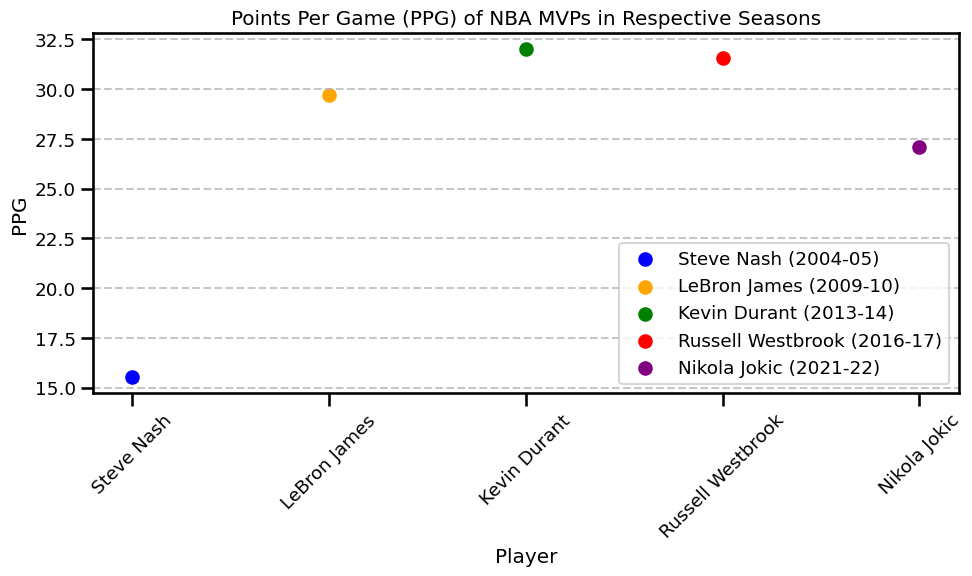

In [163]:

# Define the player names, their corresponding seasons, and PPGs
players = ['Steve Nash', 'LeBron James', 'Kevin Durant', 'Russell Westbrook', 'Nikola Jokic']
seasons = ['2004-05', '2009-10', '2013-14', '2016-17', '2021-22']
ppgs = [
    steve_nash_mvp_stats['ppg'].values[0],
    lebron_james_2010_stats['ppg'].values[0],
    kevin_durant_2014_stats['ppg'].values[0],
    russell_westbrook_2017_stats['ppg'].values[0],
    nikola_jokic_2022_stats['ppg'].values[0]
]

#colors for each player
colors = ['blue', 'orange', 'green', 'red', 'purple']

#scatter plot
plt.figure(figsize=(10, 6))
for player, season, ppg, color in zip(players, seasons, ppgs, colors):
    plt.scatter(player, ppg, label=f'{player} ({season})', color=color)

plt.title('Points Per Game (PPG) of NBA MVPs in Respective Seasons')
plt.xlabel('Player')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

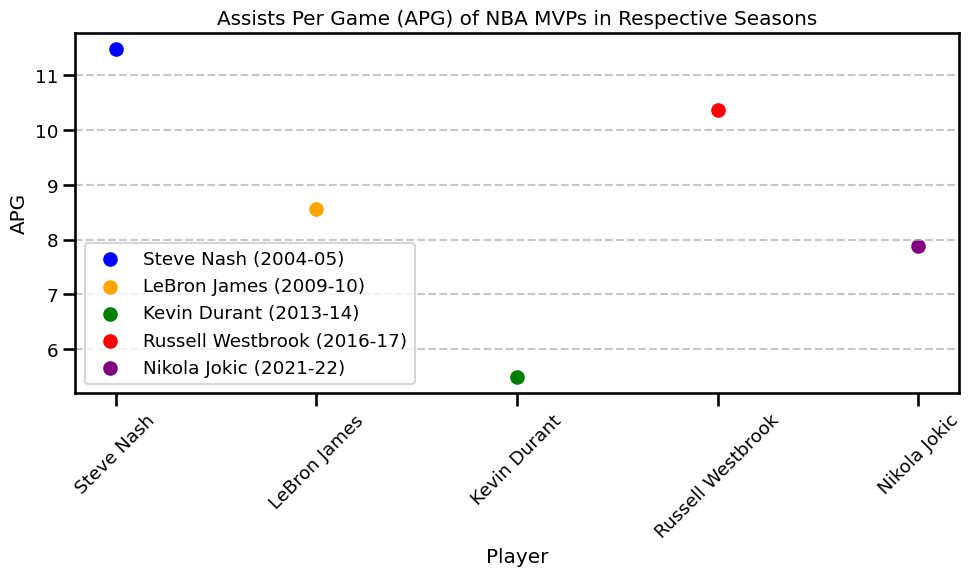

In [162]:

#define the player names, their corresponding seasons, and APGs
players = ['Steve Nash', 'LeBron James', 'Kevin Durant', 'Russell Westbrook', 'Nikola Jokic']
seasons = ['2004-05', '2009-10', '2013-14', '2016-17', '2021-22']
apgs = [
    steve_nash_mvp_stats['apg'].values[0],
    lebron_james_2010_stats['apg'].values[0],
    kevin_durant_2014_stats['apg'].values[0],
    russell_westbrook_2017_stats['apg'].values[0],
    nikola_jokic_2022_stats['apg'].values[0]
]

colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(10, 6))
for player, season, apg, color in zip(players, seasons, apgs, colors):
    plt.scatter(player, apg, label=f'{player} ({season})', color=color)

plt.title('Assists Per Game (APG) of NBA MVPs in Respective Seasons')
plt.xlabel('Player')
plt.ylabel('APG')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

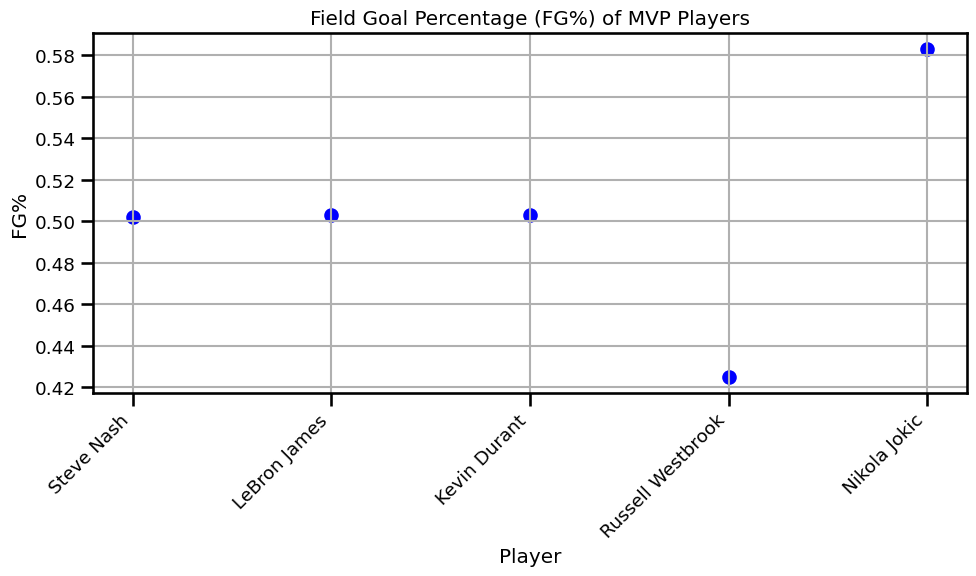

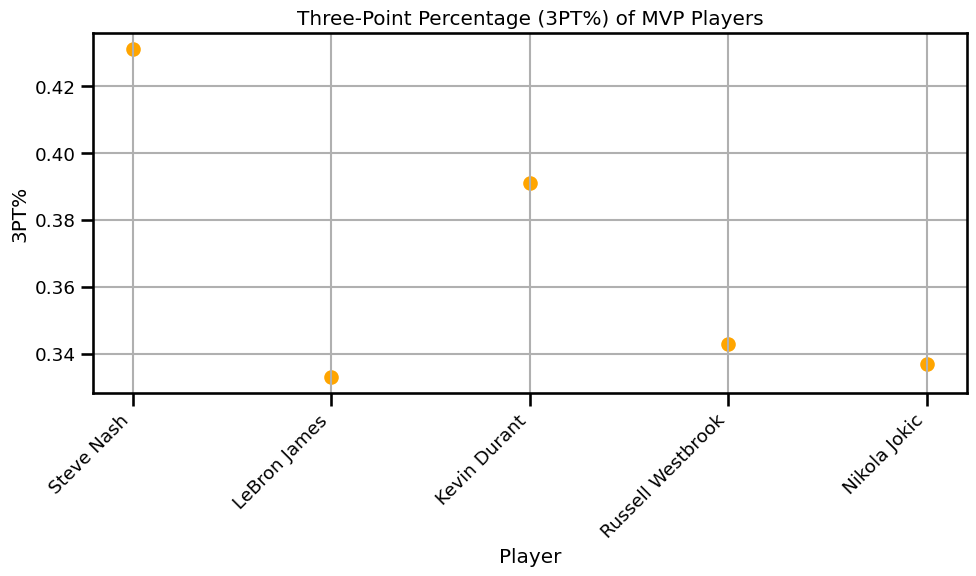

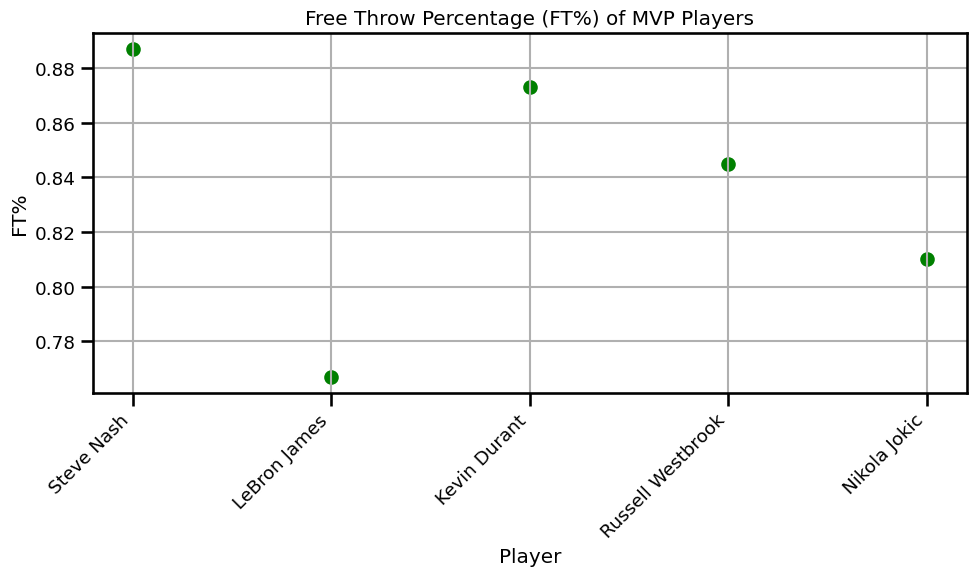

In [135]:
players = ['Steve Nash', 'LeBron James', 'Kevin Durant', 'Russell Westbrook', 'Nikola Jokic']
fg_percentages = [
    steve_nash_mvp_stats['field_goal_pct'].values[0],
    lebron_james_2010_stats['field_goal_pct'].values[0],
    kevin_durant_2014_stats['field_goal_pct'].values[0],
    russell_westbrook_2017_stats['field_goal_pct'].values[0],
    nikola_jokic_2022_stats['field_goal_pct'].values[0]
]
three_pt_percentages = [
    steve_nash_mvp_stats['three_point_pct'].values[0],
    lebron_james_2010_stats['three_point_pct'].values[0],
    kevin_durant_2014_stats['three_point_pct'].values[0],
    russell_westbrook_2017_stats['three_point_pct'].values[0],
    nikola_jokic_2022_stats['three_point_pct'].values[0]
]
ft_percentages = [
    steve_nash_mvp_stats['free_throw_pct'].values[0],
    lebron_james_2010_stats['free_throw_pct'].values[0],
    kevin_durant_2014_stats['free_throw_pct'].values[0],
    russell_westbrook_2017_stats['free_throw_pct'].values[0],
    nikola_jokic_2022_stats['free_throw_pct'].values[0]
]

# Plot FG% scatter plot
plt.figure(figsize=(10, 6))
for i, player in enumerate(players):
    plt.scatter(player, fg_percentages[i], color='blue', label='FG%' if i == 0 else '')
    plt.text(player, fg_percentages[i], '', ha='center', va='bottom')

plt.xlabel('Player')
plt.ylabel('FG%')
plt.title('Field Goal Percentage (FG%) of MVP Players')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3PT% scatter plot
plt.figure(figsize=(10, 6))
for i, player in enumerate(players):
    plt.scatter(player, three_pt_percentages[i], color='orange', label='3PT%' if i == 0 else '')
    plt.text(player, three_pt_percentages[i], '', ha='center', va='bottom')

plt.xlabel('Player')
plt.ylabel('3PT%')
plt.title('Three-Point Percentage (3PT%) of MVP Players')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot FT% scatter plot
plt.figure(figsize=(10, 6))
for i, player in enumerate(players):
    plt.scatter(player, ft_percentages[i], color='green', label='FT%' if i == 0 else '')
    plt.text(player, ft_percentages[i], '', ha='center', va='bottom')

plt.xlabel('Player')
plt.ylabel('FT%')
plt.title('Free Throw Percentage (FT%) of MVP Players')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

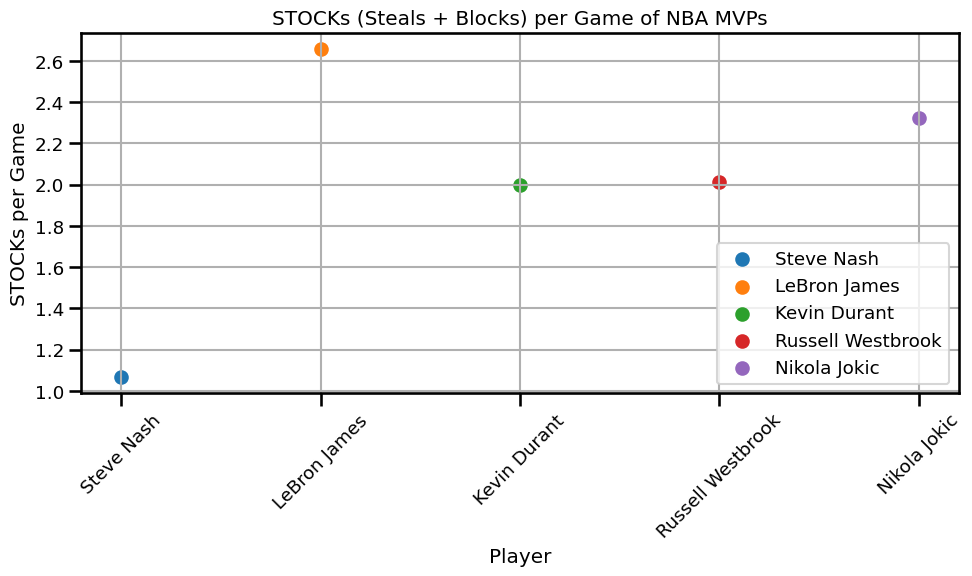

In [164]:
#compare the 5 players' STOCKs per game 
players = ['Steve Nash', 'LeBron James', 'Kevin Durant', 'Russell Westbrook', 'Nikola Jokic']
stocks = [
    steve_nash_mvp_stats['stocks'].values[0],
    lebron_james_2010_stats['stocks'].values[0],
    kevin_durant_2014_stats['stocks'].values[0],
    russell_westbrook_2017_stats['stocks'].values[0],
    nikola_jokic_2022_stats['stocks'].values[0]
]

#scatter plot
plt.figure(figsize=(10, 6))
for player, stock in zip(players, stocks):
    plt.scatter(player, stock, label=player)
    
plt.title('STOCKs (Steals + Blocks) per Game of NBA MVPs')
plt.xlabel('Player')
plt.ylabel('STOCKs per Game')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Comparison Between the MVPs***

1) Scoring: We can see clearly that the other MVPs had much higher PPG than Steve Nash. It can highlight the fact that players needed to score more points to win games and as a result win MVP. Scoring is definitely more looked at when taking into account who the MVP should be.


-->FG%: their FG%s vary, with LeBron James and Kevin Durant having slightly better shooting from the field but averaging much more PPG. Russell Westbrook is considerably less efficient than Steve Nash, but we must take into account that he scored much more points. His lack in efficiency could be due to the fact that he was the team's main scorer and playmaker. Him taking more shots may mean he scores more points, but could also mean that he takes more shots to reach those points. Nikola Jokic almost shoots 60% from the field which is really crazy compared to Nash as he also has more points. 


-->3PT%: Steve Nash was the most efficient 3PT shooter out of the 5 MVPs. No one really comes close except Kevin Durant, who comes within 4% of Nash. This could be due to the fact that Nash attempted less 3PT shots per game than the other MVPs, due to the fact that 3PT shots were attempted way more in the modern game, and Nash himself said that he should've shot more.


-->FT%: Nash was also the best FT shooter out of the players. This could be due to the same reasons as the above, for 3PT shooting.

2) Playmaking: Again we can see that Nash had the highest assists per game. From our current analysis of Steve Nash against the other MVPs, we can say that they were much better scorers than Nash due to their extreme increase in PPG, but Nash is a better playmaker than all of them.

3)Defence: We can observe that Nash was a considerably worse defender than all the other MVPs, this can indicate that overall the defensive level of a player was not considered when voting for an MVP.



Moving on from the comparison of Nash and the other MVPs, let us compare his scoring and playmaking to players after him:

In [136]:
#players in 2010, 2015, 2020, 2024 who had a higher PPG than Steve Nash's 2005 season
top_ppg_2005 = steve_nash_mvp_stats['ppg'].values[0]
top_ppg_2005

players_2010 = playerStats[playerStats['season'] == '2009-10']
players_2015 = playerStats[playerStats['season'] == '2014-15']
players_2020 = playerStats[playerStats['season'] == '2019-20']
players_2024 = playerStats[playerStats['season'] == '2023-24']

players_2010_higher_ppg = players_2010[players_2010['ppg'] > top_ppg_2005]['player_name'].values
players_2015_higher_ppg = players_2015[players_2015['ppg'] > top_ppg_2005]['player_name'].values
players_2020_higher_ppg = players_2020[players_2020['ppg'] > top_ppg_2005]['player_name'].values
players_2024_higher_ppg = players_2024[players_2024['ppg'] > top_ppg_2005]['player_name'].values

print("Number of players with higher PPG than Steve Nash's 2005 season:")
print("2010:", len(players_2010_higher_ppg))
print("2015:", len(players_2015_higher_ppg))
print("2020:", len(players_2020_higher_ppg))
print("2024:", len(players_2024_higher_ppg))







Number of players with higher PPG than Steve Nash's 2005 season:
2010: 67
2015: 62
2020: 82
2024: 92


In [137]:

#players in 2010, 2015, 2020, 2024 who had a higher APG than Steve Nash's 2005 season
top_apg_2005 = steve_nash_mvp_stats['apg'].values[0]
top_apg_2005

players_2010_higher_apg = players_2010[players_2010['apg'] > top_apg_2005]['player_name'].values
players_2015_higher_apg = players_2015[players_2015['apg'] > top_apg_2005]['player_name'].values
players_2020_higher_apg = players_2020[players_2020['apg'] > top_apg_2005]['player_name'].values
players_2024_higher_apg = players_2024[players_2024['apg'] > top_apg_2005]['player_name'].values

print("Number of players with higher APG than Steve Nash's 2005 season:")
print("2010:", len(players_2010_higher_apg))
print("2015:", len(players_2015_higher_apg))
print("2020:", len(players_2020_higher_apg))
print("2024:", len(players_2024_higher_apg))


Number of players with higher APG than Steve Nash's 2005 season:
2010: 0
2015: 0
2020: 0
2024: 0


In [138]:
#players in 2010, 2015, 2020, 2024 who had higher amount of turnovers per game (minimum 5 APG) than Steve Nash's 2005 season
top_ast_to_2005 = steve_nash_mvp_stats['ast_to_ratio'].values[0] 
top_ast_to_2005

players_2010_higher_ast_to = players_2010[(players_2010['ast_to_ratio'] > top_ast_to_2005) & (players_2010['apg'] >= 5)]['player_name'].values
players_2015_higher_ast_to = players_2015[(players_2015['ast_to_ratio'] > top_ast_to_2005) & (players_2015['apg'] >= 5)]['player_name'].values
players_2020_higher_ast_to = players_2020[(players_2020['ast_to_ratio'] > top_ast_to_2005) & (players_2020['apg'] >= 5)]['player_name'].values
players_2024_higher_ast_to = players_2024[(players_2024['ast_to_ratio'] > top_ast_to_2005) & (players_2024['apg'] >= 5)]['player_name'].values

print("Number of players with higher AST/TO ratio than Steve Nash's 2005 season (minimum 5 APG):")
print("2010:", len(players_2010_higher_ast_to))
print("2015:", len(players_2015_higher_ast_to))
print("2020:", len(players_2020_higher_ast_to))
print("2024:", len(players_2024_higher_ast_to))




Number of players with higher AST/TO ratio than Steve Nash's 2005 season (minimum 5 APG):
2010: 3
2015: 3
2020: 1
2024: 12


In [139]:
#players in 2010, 2015, 2020, 2024 who had a higher FG% but also had higher PPG than Steve Nash's 2005 season
top_fg_pct_2005 = steve_nash_mvp_stats['field_goal_pct'].values[0]
top_fg_pct_2005

players_2010_higher_fg_pct = players_2010[(players_2010['field_goal_pct'] > top_fg_pct_2005) & (players_2010['ppg'] > top_ppg_2005)]['player_name'].values

players_2015_higher_fg_pct = players_2015[(players_2015['field_goal_pct'] > top_fg_pct_2005) & (players_2015['ppg'] > top_ppg_2005)]['player_name'].values

players_2020_higher_fg_pct = players_2020[(players_2020['field_goal_pct'] > top_fg_pct_2005) & (players_2020['ppg'] > top_ppg_2005)]['player_name'].values

players_2024_higher_fg_pct = players_2024[(players_2024['field_goal_pct'] > top_fg_pct_2005) & (players_2024['ppg'] > top_ppg_2005)]['player_name'].values

print("Number of players with higher FG% and higher PPG than Steve Nash's 2005 season:")
print("2010:", len(players_2010_higher_fg_pct))
print("2015:", len(players_2015_higher_fg_pct))
print("2020:", len(players_2020_higher_fg_pct))
print("2024:", len(players_2024_higher_fg_pct))


Number of players with higher FG% and higher PPG than Steve Nash's 2005 season:
2010: 16
2015: 7
2020: 15
2024: 26


In [140]:
#players in 2010, 2015, 2020, 2024 who had a higher 3PT% but also had higher PPG than Steve Nash's 2005 season
top_3pt_pct_2005 = steve_nash_mvp_stats['three_point_pct'].values[0]
top_3pt_pct_2005

players_2010_higher_3pt_pct = players_2010[(players_2010['three_point_pct'] > top_3pt_pct_2005) & (players_2010['ppg'] > top_ppg_2005)]['player_name'].values

players_2015_higher_3pt_pct = players_2015[(players_2015['three_point_pct'] > top_3pt_pct_2005) & (players_2015['ppg'] > top_ppg_2005)]['player_name'].values

players_2020_higher_3pt_pct = players_2020[(players_2020['three_point_pct'] > top_3pt_pct_2005) & (players_2020['ppg'] > top_ppg_2005)]['player_name'].values

players_2024_higher_3pt_pct = players_2024[(players_2024['three_point_pct'] > top_3pt_pct_2005) & (players_2024['ppg'] > top_ppg_2005)]['player_name'].values   

print("Number of players with higher 3PT% and higher PPG than Steve Nash's 2005 season:")
print("2010:", len(players_2010_higher_3pt_pct))
print("2015:", len(players_2015_higher_3pt_pct))
print("2020:", len(players_2020_higher_3pt_pct))
print("2024:", len(players_2024_higher_3pt_pct))

Number of players with higher 3PT% and higher PPG than Steve Nash's 2005 season:
2010: 1
2015: 6
2020: 1
2024: 1


In [141]:
#players in 2010, 2015, 2020, 2024 who had a higher STOCKs than Steve Nash's 2005 season
top_stocks_2005 = steve_nash_mvp_stats['stocks'].values[0]
top_stocks_2005

players_2010_higher_stocks = players_2010[players_2010['stocks'] > top_stocks_2005]['player_name'].values

players_2015_higher_stocks = players_2015[players_2015['stocks'] > top_stocks_2005]['player_name'].values

players_2020_higher_stocks = players_2020[players_2020['stocks'] > top_stocks_2005]['player_name'].values

players_2024_higher_stocks = players_2024[players_2024['stocks'] > top_stocks_2005]['player_name'].values

print("Number of players with higher STOCKs than Steve Nash's 2005 season:")
print("2010:", len(players_2010_higher_stocks))
print("2015:", len(players_2015_higher_stocks))
print("2020:", len(players_2020_higher_stocks))
print("2024:", len(players_2024_higher_stocks))

Number of players with higher STOCKs than Steve Nash's 2005 season:
2010: 204
2015: 215
2020: 239
2024: 249


From the above analysis, it is clear that on the scoring side, there were 67 players in 2010 who has more PPG than Steve Nash, and that number increased to 92 in 2024. This clearly indicates that players are getting better at scoring the basketball. If we go deeper into the scoring aspect, of those players with higher PPG than Steve Nash, 16 players had a higher Field Goal Percentage than Nash, while that number increased to 26 in 2024. However, only 1 player in 2010 had a higher 3PT% than Nash in 2010, 6 in 2015, and 1 each in 2020 and 2024. 

On the playmaking aspect of the game, no players had more APG than Steve Nash in either of the years. However, we can perhaps say that players became more safer handlers of the ball. The number of players who had a higher AST/TO ratio than Nash(min. 5 APG) was 3 in 2010 and increased to 12 in 2024.

On the defensive side of the game, there were 204 players in 2010 who had more STOCKs than Steve Nash, while in 2024 there were 249 players who had more STOCKs than Nash. This shows us that many players in the current day are better defenders than an MVP in 2005. 


<br>


***Conclusion for this Question:***

Overall, the level of the NBA has gotten better, and probably more enjoyable to watch. The main reason for this is that players have gotten better at scoring. As we saw the trends of teams scoring and individual players, we can see the game has developed to be one that favours scorers more than defenders. Teams look to just outscore each other, rather than playing good defense. Alot of players are too talented at scoring, that no amount of defence would be able to stop them. 

However, we can see through our analysis that defence has gotten worse; players are getting less STOCKs per game over time. Is this a case of defence getting worse? Or scorers getting better? Or even the fact that players are protected more through rules, allowing for a much "softer" game? 

We can say for sure that playmaking has also gotten better. Players are getting more assists per game, but players like Steve Nash, if they were to play in today's game, would still be one of the best playmakers. We can also see that players are safer ball handlers as the AST/TO ratio has shown a healthy increase over time
